##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [2]:
!pip install -q tflite-model-maker

Import the required packages.

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [4]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

     8192/228813984 [..............................] - ETA: 4s

  5505024/228813984 [..............................] - ETA: 2s

  8396800/228813984 [>.............................] - ETA: 17s

 23158784/228813984 [==>...........................] - ETA: 6s 

 33562624/228813984 [===>..........................] - ETA: 7s

 47915008/228813984 [=====>........................] - ETA: 4s

 61480960/228813984 [=======>......................] - ETA: 3s

 76726272/228813984 [=========>....................] - ETA: 2s

 88367104/228813984 [==========>...................] - ETA: 2s

 92258304/228813984 [===========>..................] - ETA: 2s

 92282880/228813984 [===========>..................] - ETA: 3s

106766336/228813984 [============>.................] - ETA: 2s

121511936/228813984 [==============>...............] - ETA: 2s

131334144/228813984 [================>.............] - ETA: 1s

142614528/228813984 [=================>............] - ETA: 1s

154796032/228813984 [===================>..........] - ETA: 1s

159391744/228813984 [===================>..........] - ETA: 1s

173367296/228813984 [=====================>........] - ETA: 1s

184557568/228813984 [=======================>......] - ETA: 0s

198983680/228813984 [=========================>....] - ETA: 0s

214286336/228813984 [===========================>..] - ETA: 0s

228818944/228813984 [==============================] - 4s 0us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in GitHub.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


Step 1.   Load input data specific to an on-device ML app. Split it to training data and testing data.

In [5]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Step 2. Customize the TensorFlow model.

In [6]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


  1/103 [..............................] - ETA: 22:32 - loss: 1.7400 - accuracy: 0.0625

  3/103 [..............................] - ETA: 3s - loss: 1.7251 - accuracy: 0.1337   

  5/103 [>.............................] - ETA: 3s - loss: 1.6975 - accuracy: 0.1649

  7/103 [=>............................] - ETA: 3s - loss: 1.6781 - accuracy: 0.1828

  9/103 [=>............................] - ETA: 3s - loss: 1.6558 - accuracy: 0.2061

 11/103 [==>...........................] - ETA: 3s - loss: 1.6285 - accuracy: 0.2329

 13/103 [==>...........................] - ETA: 3s - loss: 1.5999 - accuracy: 0.2589

 15/103 [===>..........................] - ETA: 3s - loss: 1.5730 - accuracy: 0.2827

 17/103 [===>..........................] - ETA: 3s - loss: 1.5468 - accuracy: 0.3049

 19/103 [====>.........................] - ETA: 3s - loss: 1.5226 - accuracy: 0.3248

 21/103 [=====>........................] - ETA: 2s - loss: 1.4998 - accuracy: 0.3425

 23/103 [=====>........................] - ETA: 2s - loss: 1.4782 - accuracy: 0.3586

 25/103 [======>.......................] - ETA: 2s - loss: 1.4580 - accuracy: 0.3733

 27/103 [======>.......................] - ETA: 2s - loss: 1.4388 - accuracy: 0.3866

 29/103 [=======>......................] - ETA: 2s - loss: 1.4208 - accuracy: 0.3990

 31/103 [========>.....................] - ETA: 2s - loss: 1.4034 - accuracy: 0.4110

 33/103 [========>.....................] - ETA: 2s - loss: 1.3865 - accuracy: 0.4225

 35/103 [=========>....................] - ETA: 2s - loss: 1.3706 - accuracy: 0.4335

 37/103 [=========>....................] - ETA: 2s - loss: 1.3554 - accuracy: 0.4440

 39/103 [==========>...................] - ETA: 2s - loss: 1.3411 - accuracy: 0.4539

 41/103 [==========>...................] - ETA: 2s - loss: 1.3273 - accuracy: 0.4633

 43/103 [===========>..................] - ETA: 2s - loss: 1.3142 - accuracy: 0.4722

 45/103 [============>.................] - ETA: 2s - loss: 1.3017 - accuracy: 0.4808

 47/103 [============>.................] - ETA: 1s - loss: 1.2899 - accuracy: 0.4888

 49/103 [=============>................] - ETA: 1s - loss: 1.2785 - accuracy: 0.4965

 51/103 [=============>................] - ETA: 1s - loss: 1.2676 - accuracy: 0.5039

 53/103 [==============>...............] - ETA: 1s - loss: 1.2571 - accuracy: 0.5111

 55/103 [===============>..............] - ETA: 1s - loss: 1.2471 - accuracy: 0.5179

 57/103 [===============>..............] - ETA: 1s - loss: 1.2377 - accuracy: 0.5242

 59/103 [================>.............] - ETA: 1s - loss: 1.2286 - accuracy: 0.5304

 61/103 [================>.............] - ETA: 1s - loss: 1.2198 - accuracy: 0.5362

 63/103 [=================>............] - ETA: 1s - loss: 1.2114 - accuracy: 0.5419

 65/103 [=================>............] - ETA: 1s - loss: 1.2032 - accuracy: 0.5474

 67/103 [==================>...........] - ETA: 1s - loss: 1.1954 - accuracy: 0.5526

 69/103 [===================>..........] - ETA: 1s - loss: 1.1879 - accuracy: 0.5576

 71/103 [===================>..........] - ETA: 1s - loss: 1.1805 - accuracy: 0.5625

 73/103 [====================>.........] - ETA: 1s - loss: 1.1735 - accuracy: 0.5671

 75/103 [====================>.........] - ETA: 0s - loss: 1.1667 - accuracy: 0.5716

 77/103 [=====================>........] - ETA: 0s - loss: 1.1602 - accuracy: 0.5760

 79/103 [======================>.......] - ETA: 0s - loss: 1.1538 - accuracy: 0.5802

 81/103 [======================>.......] - ETA: 0s - loss: 1.1476 - accuracy: 0.5843

 83/103 [=======================>......] - ETA: 0s - loss: 1.1416 - accuracy: 0.5883

 85/103 [=======================>......] - ETA: 0s - loss: 1.1357 - accuracy: 0.5922

 87/103 [========================>.....] - ETA: 0s - loss: 1.1300 - accuracy: 0.5960

 89/103 [========================>.....] - ETA: 0s - loss: 1.1243 - accuracy: 0.5997

 91/103 [=========================>....] - ETA: 0s - loss: 1.1189 - accuracy: 0.6033

 93/103 [==========================>...] - ETA: 0s - loss: 1.1136 - accuracy: 0.6067

 95/103 [==========================>...] - ETA: 0s - loss: 1.1085 - accuracy: 0.6101

 97/103 [===========================>..] - ETA: 0s - loss: 1.1036 - accuracy: 0.6133

 99/103 [===========================>..] - ETA: 0s - loss: 1.0987 - accuracy: 0.6165

101/103 [============================>.] - ETA: 0s - loss: 1.0940 - accuracy: 0.6195

103/103 [==============================] - ETA: 0s - loss: 1.0894 - accuracy: 0.6225

103/103 [==============================] - 17s 36ms/step - loss: 1.0871 - accuracy: 0.6240


Epoch 2/5
  1/103 [..............................] - ETA: 3s - loss: 0.8781 - accuracy: 0.8125

  3/103 [..............................] - ETA: 3s - loss: 0.7860 - accuracy: 0.8455

  5/103 [>.............................] - ETA: 3s - loss: 0.7522 - accuracy: 0.8654

  7/103 [=>............................] - ETA: 3s - loss: 0.7313 - accuracy: 0.8756

  9/103 [=>............................] - ETA: 3s - loss: 0.7160 - accuracy: 0.8824

 11/103 [==>...........................] - ETA: 3s - loss: 0.7054 - accuracy: 0.8865

 13/103 [==>...........................] - ETA: 3s - loss: 0.6969 - accuracy: 0.8903

 15/103 [===>..........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.8930

 17/103 [===>..........................] - ETA: 2s - loss: 0.6867 - accuracy: 0.8953

 19/103 [====>.........................] - ETA: 2s - loss: 0.6834 - accuracy: 0.8965

 21/103 [=====>........................] - ETA: 2s - loss: 0.6814 - accuracy: 0.8966

 23/103 [=====>........................] - ETA: 2s - loss: 0.6799 - accuracy: 0.8966

 25/103 [======>.......................] - ETA: 2s - loss: 0.6794 - accuracy: 0.8961

 27/103 [======>.......................] - ETA: 2s - loss: 0.6790 - accuracy: 0.8955

 29/103 [=======>......................] - ETA: 2s - loss: 0.6786 - accuracy: 0.8948

 31/103 [========>.....................] - ETA: 2s - loss: 0.6780 - accuracy: 0.8943

 33/103 [========>.....................] - ETA: 2s - loss: 0.6773 - accuracy: 0.8939

 35/103 [=========>....................] - ETA: 2s - loss: 0.6767 - accuracy: 0.8937

 37/103 [=========>....................] - ETA: 2s - loss: 0.6760 - accuracy: 0.8936

 39/103 [==========>...................] - ETA: 2s - loss: 0.6753 - accuracy: 0.8936

 41/103 [==========>...................] - ETA: 2s - loss: 0.6746 - accuracy: 0.8937

 43/103 [===========>..................] - ETA: 2s - loss: 0.6741 - accuracy: 0.8937

 45/103 [============>.................] - ETA: 2s - loss: 0.6736 - accuracy: 0.8936

 47/103 [============>.................] - ETA: 1s - loss: 0.6732 - accuracy: 0.8935

 49/103 [=============>................] - ETA: 1s - loss: 0.6729 - accuracy: 0.8935

 51/103 [=============>................] - ETA: 1s - loss: 0.6726 - accuracy: 0.8935

 53/103 [==============>...............] - ETA: 1s - loss: 0.6723 - accuracy: 0.8934

 55/103 [===============>..............] - ETA: 1s - loss: 0.6721 - accuracy: 0.8934

 57/103 [===============>..............] - ETA: 1s - loss: 0.6721 - accuracy: 0.8931

 59/103 [================>.............] - ETA: 1s - loss: 0.6721 - accuracy: 0.8929

 61/103 [================>.............] - ETA: 1s - loss: 0.6721 - accuracy: 0.8928

 63/103 [=================>............] - ETA: 1s - loss: 0.6720 - accuracy: 0.8926

 65/103 [=================>............] - ETA: 1s - loss: 0.6720 - accuracy: 0.8924

 67/103 [==================>...........] - ETA: 1s - loss: 0.6720 - accuracy: 0.8923

 69/103 [===================>..........] - ETA: 1s - loss: 0.6719 - accuracy: 0.8921

 71/103 [===================>..........] - ETA: 1s - loss: 0.6719 - accuracy: 0.8920

 73/103 [====================>.........] - ETA: 1s - loss: 0.6718 - accuracy: 0.8919

 75/103 [====================>.........] - ETA: 0s - loss: 0.6718 - accuracy: 0.8918

 77/103 [=====================>........] - ETA: 0s - loss: 0.6719 - accuracy: 0.8916

 79/103 [======================>.......] - ETA: 0s - loss: 0.6718 - accuracy: 0.8915

 81/103 [======================>.......] - ETA: 0s - loss: 0.6718 - accuracy: 0.8914

 83/103 [=======================>......] - ETA: 0s - loss: 0.6717 - accuracy: 0.8913

 85/103 [=======================>......] - ETA: 0s - loss: 0.6716 - accuracy: 0.8912

 87/103 [========================>.....] - ETA: 0s - loss: 0.6714 - accuracy: 0.8912

 89/103 [========================>.....] - ETA: 0s - loss: 0.6713 - accuracy: 0.8911

 91/103 [=========================>....] - ETA: 0s - loss: 0.6711 - accuracy: 0.8911

 93/103 [==========================>...] - ETA: 0s - loss: 0.6709 - accuracy: 0.8910

 95/103 [==========================>...] - ETA: 0s - loss: 0.6708 - accuracy: 0.8910

 97/103 [===========================>..] - ETA: 0s - loss: 0.6706 - accuracy: 0.8910

 99/103 [===========================>..] - ETA: 0s - loss: 0.6704 - accuracy: 0.8910

101/103 [============================>.] - ETA: 0s - loss: 0.6702 - accuracy: 0.8911

103/103 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.8911

103/103 [==============================] - 4s 35ms/step - loss: 0.6699 - accuracy: 0.8911


Epoch 3/5


  1/103 [..............................] - ETA: 5s - loss: 0.7463 - accuracy: 0.8438

  3/103 [..............................] - ETA: 3s - loss: 0.7189 - accuracy: 0.8524

  5/103 [>.............................] - ETA: 3s - loss: 0.6934 - accuracy: 0.8671

  7/103 [=>............................] - ETA: 3s - loss: 0.6817 - accuracy: 0.8734

  9/103 [=>............................] - ETA: 3s - loss: 0.6682 - accuracy: 0.8815

 11/103 [==>...........................] - ETA: 3s - loss: 0.6575 - accuracy: 0.8876

 13/103 [==>...........................] - ETA: 3s - loss: 0.6499 - accuracy: 0.8928

 15/103 [===>..........................] - ETA: 3s - loss: 0.6444 - accuracy: 0.8970

 17/103 [===>..........................] - ETA: 3s - loss: 0.6400 - accuracy: 0.9002

 19/103 [====>.........................] - ETA: 2s - loss: 0.6372 - accuracy: 0.9025

 21/103 [=====>........................] - ETA: 2s - loss: 0.6357 - accuracy: 0.9036

 23/103 [=====>........................] - ETA: 2s - loss: 0.6343 - accuracy: 0.9045

 25/103 [======>.......................] - ETA: 2s - loss: 0.6338 - accuracy: 0.9049

 27/103 [======>.......................] - ETA: 2s - loss: 0.6335 - accuracy: 0.9054

 29/103 [=======>......................] - ETA: 2s - loss: 0.6332 - accuracy: 0.9060

 31/103 [========>.....................] - ETA: 2s - loss: 0.6328 - accuracy: 0.9066

 33/103 [========>.....................] - ETA: 2s - loss: 0.6324 - accuracy: 0.9072

 35/103 [=========>....................] - ETA: 2s - loss: 0.6320 - accuracy: 0.9078

 37/103 [=========>....................] - ETA: 2s - loss: 0.6315 - accuracy: 0.9084

 39/103 [==========>...................] - ETA: 2s - loss: 0.6310 - accuracy: 0.9090

 41/103 [==========>...................] - ETA: 2s - loss: 0.6305 - accuracy: 0.9095

 43/103 [===========>..................] - ETA: 2s - loss: 0.6302 - accuracy: 0.9099

 45/103 [============>.................] - ETA: 2s - loss: 0.6299 - accuracy: 0.9102

 47/103 [============>.................] - ETA: 1s - loss: 0.6297 - accuracy: 0.9104

 49/103 [=============>................] - ETA: 1s - loss: 0.6294 - accuracy: 0.9107

 51/103 [=============>................] - ETA: 1s - loss: 0.6292 - accuracy: 0.9109

 53/103 [==============>...............] - ETA: 1s - loss: 0.6289 - accuracy: 0.9111

 55/103 [===============>..............] - ETA: 1s - loss: 0.6286 - accuracy: 0.9113

 57/103 [===============>..............] - ETA: 1s - loss: 0.6285 - accuracy: 0.9114

 59/103 [================>.............] - ETA: 1s - loss: 0.6284 - accuracy: 0.9114

 61/103 [================>.............] - ETA: 1s - loss: 0.6283 - accuracy: 0.9115

 63/103 [=================>............] - ETA: 1s - loss: 0.6283 - accuracy: 0.9116

 65/103 [=================>............] - ETA: 1s - loss: 0.6282 - accuracy: 0.9117

 67/103 [==================>...........] - ETA: 1s - loss: 0.6281 - accuracy: 0.9118

 69/103 [===================>..........] - ETA: 1s - loss: 0.6281 - accuracy: 0.9118

 71/103 [===================>..........] - ETA: 1s - loss: 0.6281 - accuracy: 0.9119

 73/103 [====================>.........] - ETA: 1s - loss: 0.6280 - accuracy: 0.9119

 75/103 [====================>.........] - ETA: 1s - loss: 0.6280 - accuracy: 0.9119

 77/103 [=====================>........] - ETA: 0s - loss: 0.6280 - accuracy: 0.9119

 79/103 [======================>.......] - ETA: 0s - loss: 0.6280 - accuracy: 0.9119

 81/103 [======================>.......] - ETA: 0s - loss: 0.6280 - accuracy: 0.9119

 83/103 [=======================>......] - ETA: 0s - loss: 0.6279 - accuracy: 0.9119

 85/103 [=======================>......] - ETA: 0s - loss: 0.6278 - accuracy: 0.9119

 87/103 [========================>.....] - ETA: 0s - loss: 0.6278 - accuracy: 0.9119

 89/103 [========================>.....] - ETA: 0s - loss: 0.6277 - accuracy: 0.9119

 91/103 [=========================>....] - ETA: 0s - loss: 0.6276 - accuracy: 0.9120

 93/103 [==========================>...] - ETA: 0s - loss: 0.6275 - accuracy: 0.9120

 95/103 [==========================>...] - ETA: 0s - loss: 0.6274 - accuracy: 0.9120

 97/103 [===========================>..] - ETA: 0s - loss: 0.6273 - accuracy: 0.9121

 99/103 [===========================>..] - ETA: 0s - loss: 0.6272 - accuracy: 0.9121

101/103 [============================>.] - ETA: 0s - loss: 0.6271 - accuracy: 0.9122

103/103 [==============================] - ETA: 0s - loss: 0.6270 - accuracy: 0.9122

103/103 [==============================] - 4s 37ms/step - loss: 0.6270 - accuracy: 0.9123


Epoch 4/5
  1/103 [..............................] - ETA: 4s - loss: 0.6565 - accuracy: 0.8438

  3/103 [..............................] - ETA: 3s - loss: 0.6701 - accuracy: 0.8507

  5/103 [>.............................] - ETA: 3s - loss: 0.6579 - accuracy: 0.8701

  7/103 [=>............................] - ETA: 3s - loss: 0.6490 - accuracy: 0.8810

  9/103 [=>............................] - ETA: 3s - loss: 0.6386 - accuracy: 0.8903

 11/103 [==>...........................] - ETA: 3s - loss: 0.6307 - accuracy: 0.8973

 13/103 [==>...........................] - ETA: 3s - loss: 0.6248 - accuracy: 0.9027

 15/103 [===>..........................] - ETA: 3s - loss: 0.6201 - accuracy: 0.9073

 17/103 [===>..........................] - ETA: 3s - loss: 0.6167 - accuracy: 0.9110

 19/103 [====>.........................] - ETA: 2s - loss: 0.6144 - accuracy: 0.9132

 21/103 [=====>........................] - ETA: 2s - loss: 0.6125 - accuracy: 0.9146

 23/103 [=====>........................] - ETA: 2s - loss: 0.6111 - accuracy: 0.9156

 25/103 [======>.......................] - ETA: 2s - loss: 0.6103 - accuracy: 0.9162

 27/103 [======>.......................] - ETA: 2s - loss: 0.6098 - accuracy: 0.9166

 29/103 [=======>......................] - ETA: 2s - loss: 0.6095 - accuracy: 0.9169

 31/103 [========>.....................] - ETA: 2s - loss: 0.6090 - accuracy: 0.9172

 33/103 [========>.....................] - ETA: 2s - loss: 0.6086 - accuracy: 0.9175

 35/103 [=========>....................] - ETA: 2s - loss: 0.6081 - accuracy: 0.9179

 37/103 [=========>....................] - ETA: 2s - loss: 0.6078 - accuracy: 0.9181

 39/103 [==========>...................] - ETA: 2s - loss: 0.6075 - accuracy: 0.9182

 41/103 [==========>...................] - ETA: 2s - loss: 0.6072 - accuracy: 0.9184

 43/103 [===========>..................] - ETA: 2s - loss: 0.6070 - accuracy: 0.9185

 45/103 [============>.................] - ETA: 2s - loss: 0.6069 - accuracy: 0.9185

 47/103 [============>.................] - ETA: 2s - loss: 0.6069 - accuracy: 0.9185

 49/103 [=============>................] - ETA: 1s - loss: 0.6068 - accuracy: 0.9186

 51/103 [=============>................] - ETA: 1s - loss: 0.6067 - accuracy: 0.9187

 53/103 [==============>...............] - ETA: 1s - loss: 0.6067 - accuracy: 0.9188

 55/103 [===============>..............] - ETA: 1s - loss: 0.6067 - accuracy: 0.9189

 57/103 [===============>..............] - ETA: 1s - loss: 0.6069 - accuracy: 0.9189

 59/103 [================>.............] - ETA: 1s - loss: 0.6071 - accuracy: 0.9188

 61/103 [================>.............] - ETA: 1s - loss: 0.6072 - accuracy: 0.9188

 63/103 [=================>............] - ETA: 1s - loss: 0.6073 - accuracy: 0.9188

 65/103 [=================>............] - ETA: 1s - loss: 0.6075 - accuracy: 0.9187

 67/103 [==================>...........] - ETA: 1s - loss: 0.6077 - accuracy: 0.9187

 69/103 [===================>..........] - ETA: 1s - loss: 0.6079 - accuracy: 0.9186

 71/103 [===================>..........] - ETA: 1s - loss: 0.6080 - accuracy: 0.9185

 73/103 [====================>.........] - ETA: 1s - loss: 0.6082 - accuracy: 0.9185

 75/103 [====================>.........] - ETA: 1s - loss: 0.6085 - accuracy: 0.9184

 77/103 [=====================>........] - ETA: 0s - loss: 0.6087 - accuracy: 0.9183

 79/103 [======================>.......] - ETA: 0s - loss: 0.6089 - accuracy: 0.9182

 81/103 [======================>.......] - ETA: 0s - loss: 0.6090 - accuracy: 0.9182

 83/103 [=======================>......] - ETA: 0s - loss: 0.6092 - accuracy: 0.9181

 85/103 [=======================>......] - ETA: 0s - loss: 0.6093 - accuracy: 0.9180

 87/103 [========================>.....] - ETA: 0s - loss: 0.6094 - accuracy: 0.9180

 89/103 [========================>.....] - ETA: 0s - loss: 0.6094 - accuracy: 0.9179

 91/103 [=========================>....] - ETA: 0s - loss: 0.6095 - accuracy: 0.9179

 93/103 [==========================>...] - ETA: 0s - loss: 0.6096 - accuracy: 0.9179

 95/103 [==========================>...] - ETA: 0s - loss: 0.6096 - accuracy: 0.9179

 97/103 [===========================>..] - ETA: 0s - loss: 0.6096 - accuracy: 0.9180

 99/103 [===========================>..] - ETA: 0s - loss: 0.6096 - accuracy: 0.9180

101/103 [============================>.] - ETA: 0s - loss: 0.6096 - accuracy: 0.9180

103/103 [==============================] - ETA: 0s - loss: 0.6096 - accuracy: 0.9181

103/103 [==============================] - 4s 36ms/step - loss: 0.6096 - accuracy: 0.9181


Epoch 5/5
  1/103 [..............................] - ETA: 3s - loss: 0.6691 - accuracy: 0.8438

  3/103 [..............................] - ETA: 3s - loss: 0.6575 - accuracy: 0.8628

  5/103 [>.............................] - ETA: 3s - loss: 0.6463 - accuracy: 0.8743

  7/103 [=>............................] - ETA: 3s - loss: 0.6370 - accuracy: 0.8839

  9/103 [=>............................] - ETA: 3s - loss: 0.6268 - accuracy: 0.8934

 11/103 [==>...........................] - ETA: 3s - loss: 0.6199 - accuracy: 0.8998

 13/103 [==>...........................] - ETA: 3s - loss: 0.6142 - accuracy: 0.9052

 15/103 [===>..........................] - ETA: 3s - loss: 0.6096 - accuracy: 0.9092

 17/103 [===>..........................] - ETA: 3s - loss: 0.6063 - accuracy: 0.9121

 19/103 [====>.........................] - ETA: 2s - loss: 0.6037 - accuracy: 0.9143

 21/103 [=====>........................] - ETA: 2s - loss: 0.6017 - accuracy: 0.9159

 23/103 [=====>........................] - ETA: 2s - loss: 0.6002 - accuracy: 0.9171

 25/103 [======>.......................] - ETA: 2s - loss: 0.5992 - accuracy: 0.9180

 27/103 [======>.......................] - ETA: 2s - loss: 0.5984 - accuracy: 0.9188

 29/103 [=======>......................] - ETA: 2s - loss: 0.5978 - accuracy: 0.9195

 31/103 [========>.....................] - ETA: 2s - loss: 0.5974 - accuracy: 0.9199

 33/103 [========>.....................] - ETA: 2s - loss: 0.5969 - accuracy: 0.9204

 35/103 [=========>....................] - ETA: 2s - loss: 0.5964 - accuracy: 0.9208

 37/103 [=========>....................] - ETA: 2s - loss: 0.5959 - accuracy: 0.9212

 39/103 [==========>...................] - ETA: 2s - loss: 0.5953 - accuracy: 0.9217

 41/103 [==========>...................] - ETA: 2s - loss: 0.5948 - accuracy: 0.9221

 43/103 [===========>..................] - ETA: 2s - loss: 0.5944 - accuracy: 0.9224

 45/103 [============>.................] - ETA: 2s - loss: 0.5940 - accuracy: 0.9227

 47/103 [============>.................] - ETA: 1s - loss: 0.5937 - accuracy: 0.9229

 49/103 [=============>................] - ETA: 1s - loss: 0.5934 - accuracy: 0.9231

 51/103 [=============>................] - ETA: 1s - loss: 0.5931 - accuracy: 0.9234

 53/103 [==============>...............] - ETA: 1s - loss: 0.5928 - accuracy: 0.9237

 55/103 [===============>..............] - ETA: 1s - loss: 0.5925 - accuracy: 0.9239

 57/103 [===============>..............] - ETA: 1s - loss: 0.5924 - accuracy: 0.9240

 59/103 [================>.............] - ETA: 1s - loss: 0.5924 - accuracy: 0.9240

 61/103 [================>.............] - ETA: 1s - loss: 0.5923 - accuracy: 0.9241

 63/103 [=================>............] - ETA: 1s - loss: 0.5923 - accuracy: 0.9241

 65/103 [=================>............] - ETA: 1s - loss: 0.5923 - accuracy: 0.9241

 67/103 [==================>...........] - ETA: 1s - loss: 0.5923 - accuracy: 0.9241

 69/103 [===================>..........] - ETA: 1s - loss: 0.5923 - accuracy: 0.9241

 71/103 [===================>..........] - ETA: 1s - loss: 0.5923 - accuracy: 0.9242

 73/103 [====================>.........] - ETA: 1s - loss: 0.5924 - accuracy: 0.9242

 75/103 [====================>.........] - ETA: 1s - loss: 0.5924 - accuracy: 0.9242

 77/103 [=====================>........] - ETA: 0s - loss: 0.5925 - accuracy: 0.9242

 79/103 [======================>.......] - ETA: 0s - loss: 0.5926 - accuracy: 0.9242

 81/103 [======================>.......] - ETA: 0s - loss: 0.5926 - accuracy: 0.9242

 83/103 [=======================>......] - ETA: 0s - loss: 0.5927 - accuracy: 0.9242

 85/103 [=======================>......] - ETA: 0s - loss: 0.5927 - accuracy: 0.9242

 87/103 [========================>.....] - ETA: 0s - loss: 0.5927 - accuracy: 0.9242

 89/103 [========================>.....] - ETA: 0s - loss: 0.5927 - accuracy: 0.9243

 91/103 [=========================>....] - ETA: 0s - loss: 0.5927 - accuracy: 0.9243

 93/103 [==========================>...] - ETA: 0s - loss: 0.5927 - accuracy: 0.9243

 95/103 [==========================>...] - ETA: 0s - loss: 0.5927 - accuracy: 0.9243

 97/103 [===========================>..] - ETA: 0s - loss: 0.5927 - accuracy: 0.9244

 99/103 [===========================>..] - ETA: 0s - loss: 0.5927 - accuracy: 0.9245

101/103 [============================>.] - ETA: 0s - loss: 0.5927 - accuracy: 0.9245

103/103 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.9246

103/103 [==============================] - 4s 36ms/step - loss: 0.5926 - accuracy: 0.9246


Step 3. Evaluate the model.

In [7]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 18s - loss: 0.5991 - accuracy: 0.9688

 3/12 [======>.......................] - ETA: 0s - loss: 0.5877 - accuracy: 0.9583 

 5/12 [===========>..................] - ETA: 0s - loss: 0.5811 - accuracy: 0.9563

 7/12 [================>.............] - ETA: 0s - loss: 0.5763 - accuracy: 0.9509

 9/12 [=====================>........] - ETA: 0s - loss: 0.5797 - accuracy: 0.9444

11/12 [==========================>...] - ETA: 0s - loss: 0.5786 - accuracy: 0.9432

12/12 [==============================] - ETA: 0s - loss: 0.5824 - accuracy: 0.9401

12/12 [==============================] - 2s 44ms/step - loss: 0.5824 - accuracy: 0.9401


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata.

You could download it in the left sidebar same as the uploading part for your own use.

In [8]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp2yzek6hu/assets


INFO:tensorflow:Assets written to: /tmp/tmp2yzek6hu/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp3_67_o8e/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp3_67_o8e/labels.txt.


After this simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

### Step 1: Load Input Data Specific to an On-device ML App

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

The dataset has the following directory structure:

<pre>
<b>flower_photos</b>
|__ <b>daisy</b>
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ <b>dandelion</b>
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ <b>roses</b>
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ <b>sunflowers</b>
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ <b>tulips</b>
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
</pre>

In [9]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

Use `ImageClassifierDataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [10]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [11]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

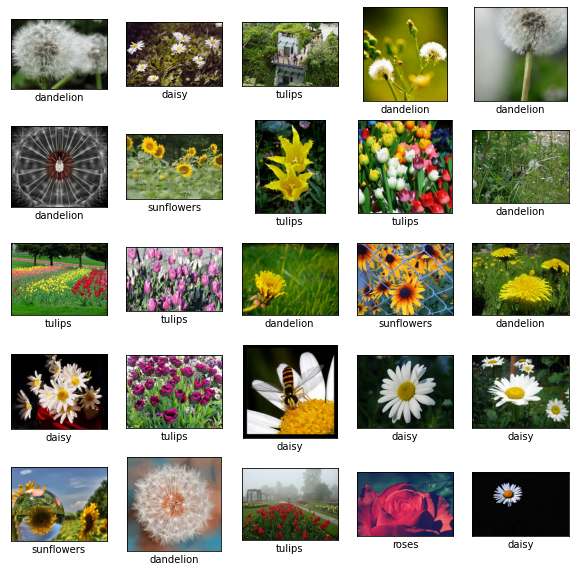

In [12]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [13]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


 1/91 [..............................] - ETA: 2:36 - loss: 1.7255 - accuracy: 0.3125

 2/91 [..............................] - ETA: 4s - loss: 1.7561 - accuracy: 0.2812  

 4/91 [>.............................] - ETA: 3s - loss: 1.7610 - accuracy: 0.2617

 6/91 [>.............................] - ETA: 3s - loss: 1.7402 - accuracy: 0.2632

 8/91 [=>............................] - ETA: 3s - loss: 1.7159 - accuracy: 0.2734

10/91 [==>...........................] - ETA: 3s - loss: 1.6910 - accuracy: 0.2841

12/91 [==>...........................] - ETA: 3s - loss: 1.6641 - accuracy: 0.2971

14/91 [===>..........................] - ETA: 3s - loss: 1.6387 - accuracy: 0.3100

16/91 [====>.........................] - ETA: 2s - loss: 1.6131 - accuracy: 0.3239

18/91 [====>.........................] - ETA: 2s - loss: 1.5878 - accuracy: 0.3382

20/91 [=====>........................] - ETA: 2s - loss: 1.5641 - accuracy: 0.3520

22/91 [======>.......................] - ETA: 2s - loss: 1.5409 - accuracy: 0.3656

24/91 [======>.......................] - ETA: 2s - loss: 1.5182 - accuracy: 0.3793

26/91 [=======>......................] - ETA: 2s - loss: 1.4962 - accuracy: 0.3925

28/91 [========>.....................] - ETA: 2s - loss: 1.4756 - accuracy: 0.4049

30/91 [========>.....................] - ETA: 2s - loss: 1.4564 - accuracy: 0.4164

32/91 [=========>....................] - ETA: 2s - loss: 1.4384 - accuracy: 0.4271

34/91 [==========>...................] - ETA: 2s - loss: 1.4211 - accuracy: 0.4374

36/91 [==========>...................] - ETA: 2s - loss: 1.4046 - accuracy: 0.4473

38/91 [===========>..................] - ETA: 2s - loss: 1.3890 - accuracy: 0.4566

40/91 [============>.................] - ETA: 1s - loss: 1.3740 - accuracy: 0.4655

42/91 [============>.................] - ETA: 1s - loss: 1.3597 - accuracy: 0.4741

44/91 [=============>................] - ETA: 1s - loss: 1.3461 - accuracy: 0.4822

46/91 [==============>...............] - ETA: 1s - loss: 1.3332 - accuracy: 0.4900

48/91 [==============>...............] - ETA: 1s - loss: 1.3208 - accuracy: 0.4975

50/91 [===============>..............] - ETA: 1s - loss: 1.3088 - accuracy: 0.5046

52/91 [================>.............] - ETA: 1s - loss: 1.2973 - accuracy: 0.5115

54/91 [================>.............] - ETA: 1s - loss: 1.2863 - accuracy: 0.5182

56/91 [=================>............] - ETA: 1s - loss: 1.2756 - accuracy: 0.5245

58/91 [==================>...........] - ETA: 1s - loss: 1.2654 - accuracy: 0.5307

60/91 [==================>...........] - ETA: 1s - loss: 1.2557 - accuracy: 0.5365

62/91 [===================>..........] - ETA: 1s - loss: 1.2464 - accuracy: 0.5421

64/91 [====================>.........] - ETA: 0s - loss: 1.2374 - accuracy: 0.5474

66/91 [====================>.........] - ETA: 0s - loss: 1.2288 - accuracy: 0.5526

68/91 [=====================>........] - ETA: 0s - loss: 1.2204 - accuracy: 0.5576

70/91 [======================>.......] - ETA: 0s - loss: 1.2123 - accuracy: 0.5625

72/91 [======================>.......] - ETA: 0s - loss: 1.2044 - accuracy: 0.5671

74/91 [=======================>......] - ETA: 0s - loss: 1.1968 - accuracy: 0.5716

76/91 [========================>.....] - ETA: 0s - loss: 1.1895 - accuracy: 0.5760

78/91 [========================>.....] - ETA: 0s - loss: 1.1825 - accuracy: 0.5801

80/91 [=========================>....] - ETA: 0s - loss: 1.1758 - accuracy: 0.5840

82/91 [==========================>...] - ETA: 0s - loss: 1.1693 - accuracy: 0.5878

84/91 [==========================>...] - ETA: 0s - loss: 1.1629 - accuracy: 0.5915

86/91 [===========================>..] - ETA: 0s - loss: 1.1568 - accuracy: 0.5951

88/91 [============================>.] - ETA: 0s - loss: 1.1508 - accuracy: 0.5986

90/91 [============================>.] - ETA: 0s - loss: 1.1450 - accuracy: 0.6020

91/91 [==============================] - 7s 60ms/step - loss: 1.1394 - accuracy: 0.6053 - val_loss: 0.6963 - val_accuracy: 0.8722


Epoch 2/5
 1/91 [..............................] - ETA: 2s - loss: 0.7420 - accuracy: 0.7812

 4/91 [>.............................] - ETA: 2s - loss: 0.7309 - accuracy: 0.8236

 6/91 [>.............................] - ETA: 2s - loss: 0.7135 - accuracy: 0.8395

 8/91 [=>............................] - ETA: 2s - loss: 0.7015 - accuracy: 0.8500

10/91 [==>...........................] - ETA: 2s - loss: 0.6944 - accuracy: 0.8560

12/91 [==>...........................] - ETA: 2s - loss: 0.6895 - accuracy: 0.8610

14/91 [===>..........................] - ETA: 2s - loss: 0.6867 - accuracy: 0.8650

16/91 [====>.........................] - ETA: 2s - loss: 0.6843 - accuracy: 0.8683

18/91 [====>.........................] - ETA: 2s - loss: 0.6815 - accuracy: 0.8717

20/91 [=====>........................] - ETA: 2s - loss: 0.6797 - accuracy: 0.8743

22/91 [======>.......................] - ETA: 2s - loss: 0.6780 - accuracy: 0.8765

24/91 [======>.......................] - ETA: 2s - loss: 0.6762 - accuracy: 0.8785

26/91 [=======>......................] - ETA: 2s - loss: 0.6745 - accuracy: 0.8804

28/91 [========>.....................] - ETA: 2s - loss: 0.6730 - accuracy: 0.8822

30/91 [========>.....................] - ETA: 2s - loss: 0.6719 - accuracy: 0.8836

32/91 [=========>....................] - ETA: 2s - loss: 0.6708 - accuracy: 0.8847

34/91 [==========>...................] - ETA: 2s - loss: 0.6700 - accuracy: 0.8855

36/91 [==========>...................] - ETA: 2s - loss: 0.6693 - accuracy: 0.8862

38/91 [===========>..................] - ETA: 1s - loss: 0.6686 - accuracy: 0.8869

40/91 [============>.................] - ETA: 1s - loss: 0.6679 - accuracy: 0.8875

42/91 [============>.................] - ETA: 1s - loss: 0.6673 - accuracy: 0.8881

44/91 [=============>................] - ETA: 1s - loss: 0.6667 - accuracy: 0.8886

46/91 [==============>...............] - ETA: 1s - loss: 0.6662 - accuracy: 0.8890

48/91 [==============>...............] - ETA: 1s - loss: 0.6657 - accuracy: 0.8894

50/91 [===============>..............] - ETA: 1s - loss: 0.6652 - accuracy: 0.8897

52/91 [================>.............] - ETA: 1s - loss: 0.6648 - accuracy: 0.8901

54/91 [================>.............] - ETA: 1s - loss: 0.6644 - accuracy: 0.8904

56/91 [=================>............] - ETA: 1s - loss: 0.6641 - accuracy: 0.8906

58/91 [==================>...........] - ETA: 1s - loss: 0.6637 - accuracy: 0.8909

60/91 [==================>...........] - ETA: 1s - loss: 0.6634 - accuracy: 0.8912

62/91 [===================>..........] - ETA: 1s - loss: 0.6631 - accuracy: 0.8913

64/91 [====================>.........] - ETA: 1s - loss: 0.6629 - accuracy: 0.8914

66/91 [====================>.........] - ETA: 0s - loss: 0.6626 - accuracy: 0.8916

68/91 [=====================>........] - ETA: 0s - loss: 0.6623 - accuracy: 0.8918

70/91 [======================>.......] - ETA: 0s - loss: 0.6620 - accuracy: 0.8920

72/91 [======================>.......] - ETA: 0s - loss: 0.6617 - accuracy: 0.8922

74/91 [=======================>......] - ETA: 0s - loss: 0.6613 - accuracy: 0.8924

76/91 [========================>.....] - ETA: 0s - loss: 0.6610 - accuracy: 0.8926

78/91 [========================>.....] - ETA: 0s - loss: 0.6608 - accuracy: 0.8928

80/91 [=========================>....] - ETA: 0s - loss: 0.6606 - accuracy: 0.8929

82/91 [==========================>...] - ETA: 0s - loss: 0.6604 - accuracy: 0.8930

84/91 [==========================>...] - ETA: 0s - loss: 0.6602 - accuracy: 0.8932

86/91 [===========================>..] - ETA: 0s - loss: 0.6600 - accuracy: 0.8933

88/91 [============================>.] - ETA: 0s - loss: 0.6598 - accuracy: 0.8934

90/91 [============================>.] - ETA: 0s - loss: 0.6596 - accuracy: 0.8936

91/91 [==============================] - 5s 53ms/step - loss: 0.6594 - accuracy: 0.8937 - val_loss: 0.6697 - val_accuracy: 0.8807


Epoch 3/5
 1/91 [..............................] - ETA: 1s - loss: 0.6096 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.6481 - accuracy: 0.8958

 7/91 [=>............................] - ETA: 1s - loss: 0.6458 - accuracy: 0.9021

 9/91 [=>............................] - ETA: 2s - loss: 0.6418 - accuracy: 0.9055

11/91 [==>...........................] - ETA: 2s - loss: 0.6386 - accuracy: 0.9083

13/91 [===>..........................] - ETA: 2s - loss: 0.6352 - accuracy: 0.9116

15/91 [===>..........................] - ETA: 2s - loss: 0.6328 - accuracy: 0.9144

17/91 [====>.........................] - ETA: 2s - loss: 0.6309 - accuracy: 0.9161

19/91 [=====>........................] - ETA: 2s - loss: 0.6286 - accuracy: 0.9176

21/91 [=====>........................] - ETA: 2s - loss: 0.6271 - accuracy: 0.9186

23/91 [======>.......................] - ETA: 2s - loss: 0.6258 - accuracy: 0.9191

25/91 [=======>......................] - ETA: 2s - loss: 0.6245 - accuracy: 0.9195

27/91 [=======>......................] - ETA: 2s - loss: 0.6234 - accuracy: 0.9199

29/91 [========>.....................] - ETA: 2s - loss: 0.6224 - accuracy: 0.9204

31/91 [=========>....................] - ETA: 2s - loss: 0.6217 - accuracy: 0.9208

33/91 [=========>....................] - ETA: 2s - loss: 0.6213 - accuracy: 0.9209

35/91 [==========>...................] - ETA: 1s - loss: 0.6211 - accuracy: 0.9210

37/91 [===========>..................] - ETA: 1s - loss: 0.6208 - accuracy: 0.9212

39/91 [===========>..................] - ETA: 1s - loss: 0.6205 - accuracy: 0.9214

41/91 [============>.................] - ETA: 1s - loss: 0.6201 - accuracy: 0.9216

43/91 [=============>................] - ETA: 1s - loss: 0.6198 - accuracy: 0.9218

45/91 [=============>................] - ETA: 1s - loss: 0.6195 - accuracy: 0.9219

47/91 [==============>...............] - ETA: 1s - loss: 0.6193 - accuracy: 0.9219

49/91 [===============>..............] - ETA: 1s - loss: 0.6191 - accuracy: 0.9220

51/91 [===============>..............] - ETA: 1s - loss: 0.6188 - accuracy: 0.9221

53/91 [================>.............] - ETA: 1s - loss: 0.6186 - accuracy: 0.9222

55/91 [=================>............] - ETA: 1s - loss: 0.6184 - accuracy: 0.9223

57/91 [=================>............] - ETA: 1s - loss: 0.6182 - accuracy: 0.9224

59/91 [==================>...........] - ETA: 1s - loss: 0.6180 - accuracy: 0.9225

61/91 [===================>..........] - ETA: 1s - loss: 0.6178 - accuracy: 0.9226

63/91 [===================>..........] - ETA: 1s - loss: 0.6177 - accuracy: 0.9226

65/91 [====================>.........] - ETA: 0s - loss: 0.6176 - accuracy: 0.9226

67/91 [=====================>........] - ETA: 0s - loss: 0.6175 - accuracy: 0.9226

69/91 [=====================>........] - ETA: 0s - loss: 0.6173 - accuracy: 0.9227

71/91 [======================>.......] - ETA: 0s - loss: 0.6171 - accuracy: 0.9228

73/91 [=======================>......] - ETA: 0s - loss: 0.6170 - accuracy: 0.9228

75/91 [=======================>......] - ETA: 0s - loss: 0.6168 - accuracy: 0.9229

77/91 [========================>.....] - ETA: 0s - loss: 0.6166 - accuracy: 0.9229

79/91 [=========================>....] - ETA: 0s - loss: 0.6165 - accuracy: 0.9229

81/91 [=========================>....] - ETA: 0s - loss: 0.6165 - accuracy: 0.9228

83/91 [==========================>...] - ETA: 0s - loss: 0.6165 - accuracy: 0.9228

85/91 [===========================>..] - ETA: 0s - loss: 0.6164 - accuracy: 0.9227

87/91 [===========================>..] - ETA: 0s - loss: 0.6164 - accuracy: 0.9226

89/91 [============================>.] - ETA: 0s - loss: 0.6164 - accuracy: 0.9226

91/91 [==============================] - ETA: 0s - loss: 0.6163 - accuracy: 0.9225

91/91 [==============================] - 5s 54ms/step - loss: 0.6163 - accuracy: 0.9225 - val_loss: 0.6525 - val_accuracy: 0.8949


Epoch 4/5
 1/91 [..............................] - ETA: 2s - loss: 0.6512 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.6454 - accuracy: 0.9102

 7/91 [=>............................] - ETA: 1s - loss: 0.6437 - accuracy: 0.9076

10/91 [==>...........................] - ETA: 1s - loss: 0.6364 - accuracy: 0.9096

13/91 [===>..........................] - ETA: 1s - loss: 0.6297 - accuracy: 0.9132

15/91 [===>..........................] - ETA: 1s - loss: 0.6264 - accuracy: 0.9154

17/91 [====>.........................] - ETA: 1s - loss: 0.6242 - accuracy: 0.9165

20/91 [=====>........................] - ETA: 1s - loss: 0.6206 - accuracy: 0.9181

22/91 [======>.......................] - ETA: 1s - loss: 0.6188 - accuracy: 0.9190

24/91 [======>.......................] - ETA: 1s - loss: 0.6170 - accuracy: 0.9199

26/91 [=======>......................] - ETA: 1s - loss: 0.6152 - accuracy: 0.9209

28/91 [========>.....................] - ETA: 1s - loss: 0.6138 - accuracy: 0.9218

30/91 [========>.....................] - ETA: 1s - loss: 0.6126 - accuracy: 0.9227

32/91 [=========>....................] - ETA: 1s - loss: 0.6115 - accuracy: 0.9235

34/91 [==========>...................] - ETA: 1s - loss: 0.6107 - accuracy: 0.9240

36/91 [==========>...................] - ETA: 1s - loss: 0.6100 - accuracy: 0.9243

38/91 [===========>..................] - ETA: 1s - loss: 0.6094 - accuracy: 0.9247

40/91 [============>.................] - ETA: 1s - loss: 0.6087 - accuracy: 0.9251

42/91 [============>.................] - ETA: 1s - loss: 0.6080 - accuracy: 0.9255

44/91 [=============>................] - ETA: 1s - loss: 0.6074 - accuracy: 0.9258

46/91 [==============>...............] - ETA: 1s - loss: 0.6067 - accuracy: 0.9262

48/91 [==============>...............] - ETA: 1s - loss: 0.6063 - accuracy: 0.9264

50/91 [===============>..............] - ETA: 1s - loss: 0.6058 - accuracy: 0.9267

52/91 [================>.............] - ETA: 1s - loss: 0.6054 - accuracy: 0.9269

54/91 [================>.............] - ETA: 1s - loss: 0.6051 - accuracy: 0.9271

56/91 [=================>............] - ETA: 1s - loss: 0.6047 - accuracy: 0.9272

57/91 [=================>............] - ETA: 1s - loss: 0.6046 - accuracy: 0.9272

59/91 [==================>...........] - ETA: 1s - loss: 0.6043 - accuracy: 0.9274

61/91 [===================>..........] - ETA: 0s - loss: 0.6040 - accuracy: 0.9275

63/91 [===================>..........] - ETA: 0s - loss: 0.6038 - accuracy: 0.9276

65/91 [====================>.........] - ETA: 0s - loss: 0.6036 - accuracy: 0.9277

67/91 [=====================>........] - ETA: 0s - loss: 0.6034 - accuracy: 0.9278

69/91 [=====================>........] - ETA: 0s - loss: 0.6032 - accuracy: 0.9279

71/91 [======================>.......] - ETA: 0s - loss: 0.6030 - accuracy: 0.9280

73/91 [=======================>......] - ETA: 0s - loss: 0.6028 - accuracy: 0.9282

75/91 [=======================>......] - ETA: 0s - loss: 0.6025 - accuracy: 0.9283

77/91 [========================>.....] - ETA: 0s - loss: 0.6023 - accuracy: 0.9284

79/91 [=========================>....] - ETA: 0s - loss: 0.6021 - accuracy: 0.9286

81/91 [=========================>....] - ETA: 0s - loss: 0.6020 - accuracy: 0.9286

83/91 [==========================>...] - ETA: 0s - loss: 0.6018 - accuracy: 0.9287

85/91 [===========================>..] - ETA: 0s - loss: 0.6017 - accuracy: 0.9287

87/91 [===========================>..] - ETA: 0s - loss: 0.6016 - accuracy: 0.9287

89/91 [============================>.] - ETA: 0s - loss: 0.6015 - accuracy: 0.9287

91/91 [==============================] - ETA: 0s - loss: 0.6014 - accuracy: 0.9288

91/91 [==============================] - 5s 53ms/step - loss: 0.6013 - accuracy: 0.9288 - val_loss: 0.6498 - val_accuracy: 0.8892


Epoch 5/5
 1/91 [..............................] - ETA: 1s - loss: 0.6086 - accuracy: 0.9062

 3/91 [..............................] - ETA: 2s - loss: 0.6270 - accuracy: 0.9132

 6/91 [>.............................] - ETA: 2s - loss: 0.6324 - accuracy: 0.9103

 9/91 [=>............................] - ETA: 1s - loss: 0.6231 - accuracy: 0.9137

12/91 [==>...........................] - ETA: 1s - loss: 0.6169 - accuracy: 0.9170

15/91 [===>..........................] - ETA: 1s - loss: 0.6108 - accuracy: 0.9212

17/91 [====>.........................] - ETA: 1s - loss: 0.6081 - accuracy: 0.9238

20/91 [=====>........................] - ETA: 1s - loss: 0.6051 - accuracy: 0.9263

23/91 [======>.......................] - ETA: 1s - loss: 0.6025 - accuracy: 0.9285

26/91 [=======>......................] - ETA: 1s - loss: 0.6001 - accuracy: 0.9305

29/91 [========>.....................] - ETA: 1s - loss: 0.5981 - accuracy: 0.9321

32/91 [=========>....................] - ETA: 1s - loss: 0.5966 - accuracy: 0.9333

35/91 [==========>...................] - ETA: 1s - loss: 0.5956 - accuracy: 0.9342

38/91 [===========>..................] - ETA: 1s - loss: 0.5946 - accuracy: 0.9350

40/91 [============>.................] - ETA: 1s - loss: 0.5941 - accuracy: 0.9354

42/91 [============>.................] - ETA: 1s - loss: 0.5936 - accuracy: 0.9358

44/91 [=============>................] - ETA: 1s - loss: 0.5930 - accuracy: 0.9362

46/91 [==============>...............] - ETA: 1s - loss: 0.5926 - accuracy: 0.9365

48/91 [==============>...............] - ETA: 1s - loss: 0.5921 - accuracy: 0.9367

50/91 [===============>..............] - ETA: 1s - loss: 0.5918 - accuracy: 0.9369

52/91 [================>.............] - ETA: 1s - loss: 0.5914 - accuracy: 0.9371

54/91 [================>.............] - ETA: 0s - loss: 0.5911 - accuracy: 0.9372

56/91 [=================>............] - ETA: 0s - loss: 0.5908 - accuracy: 0.9374

58/91 [==================>...........] - ETA: 0s - loss: 0.5906 - accuracy: 0.9375

60/91 [==================>...........] - ETA: 0s - loss: 0.5904 - accuracy: 0.9377

62/91 [===================>..........] - ETA: 0s - loss: 0.5901 - accuracy: 0.9378

64/91 [====================>.........] - ETA: 0s - loss: 0.5900 - accuracy: 0.9378

66/91 [====================>.........] - ETA: 0s - loss: 0.5898 - accuracy: 0.9379

68/91 [=====================>........] - ETA: 0s - loss: 0.5897 - accuracy: 0.9379

70/91 [======================>.......] - ETA: 0s - loss: 0.5895 - accuracy: 0.9379

72/91 [======================>.......] - ETA: 0s - loss: 0.5893 - accuracy: 0.9380

74/91 [=======================>......] - ETA: 0s - loss: 0.5891 - accuracy: 0.9381

76/91 [========================>.....] - ETA: 0s - loss: 0.5889 - accuracy: 0.9381

78/91 [========================>.....] - ETA: 0s - loss: 0.5888 - accuracy: 0.9382

80/91 [=========================>....] - ETA: 0s - loss: 0.5887 - accuracy: 0.9382

82/91 [==========================>...] - ETA: 0s - loss: 0.5886 - accuracy: 0.9381

84/91 [==========================>...] - ETA: 0s - loss: 0.5886 - accuracy: 0.9381

86/91 [===========================>..] - ETA: 0s - loss: 0.5885 - accuracy: 0.9380

88/91 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.9379

90/91 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.9378

91/91 [==============================] - 5s 55ms/step - loss: 0.5884 - accuracy: 0.9377 - val_loss: 0.6430 - val_accuracy: 0.8949


Have a look at the detailed model structure.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [15]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 12s - loss: 0.6679 - accuracy: 0.9062

 3/12 [======>.......................] - ETA: 0s - loss: 0.6668 - accuracy: 0.8958 

 5/12 [===========>..................] - ETA: 0s - loss: 0.6239 - accuracy: 0.9250

 7/12 [================>.............] - ETA: 0s - loss: 0.6450 - accuracy: 0.9018

 9/12 [=====================>........] - ETA: 0s - loss: 0.6515 - accuracy: 0.8924

11/12 [==========================>...] - ETA: 0s - loss: 0.6379 - accuracy: 0.8977

12/12 [==============================] - 1s 30ms/step - loss: 0.6348 - accuracy: 0.9019


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

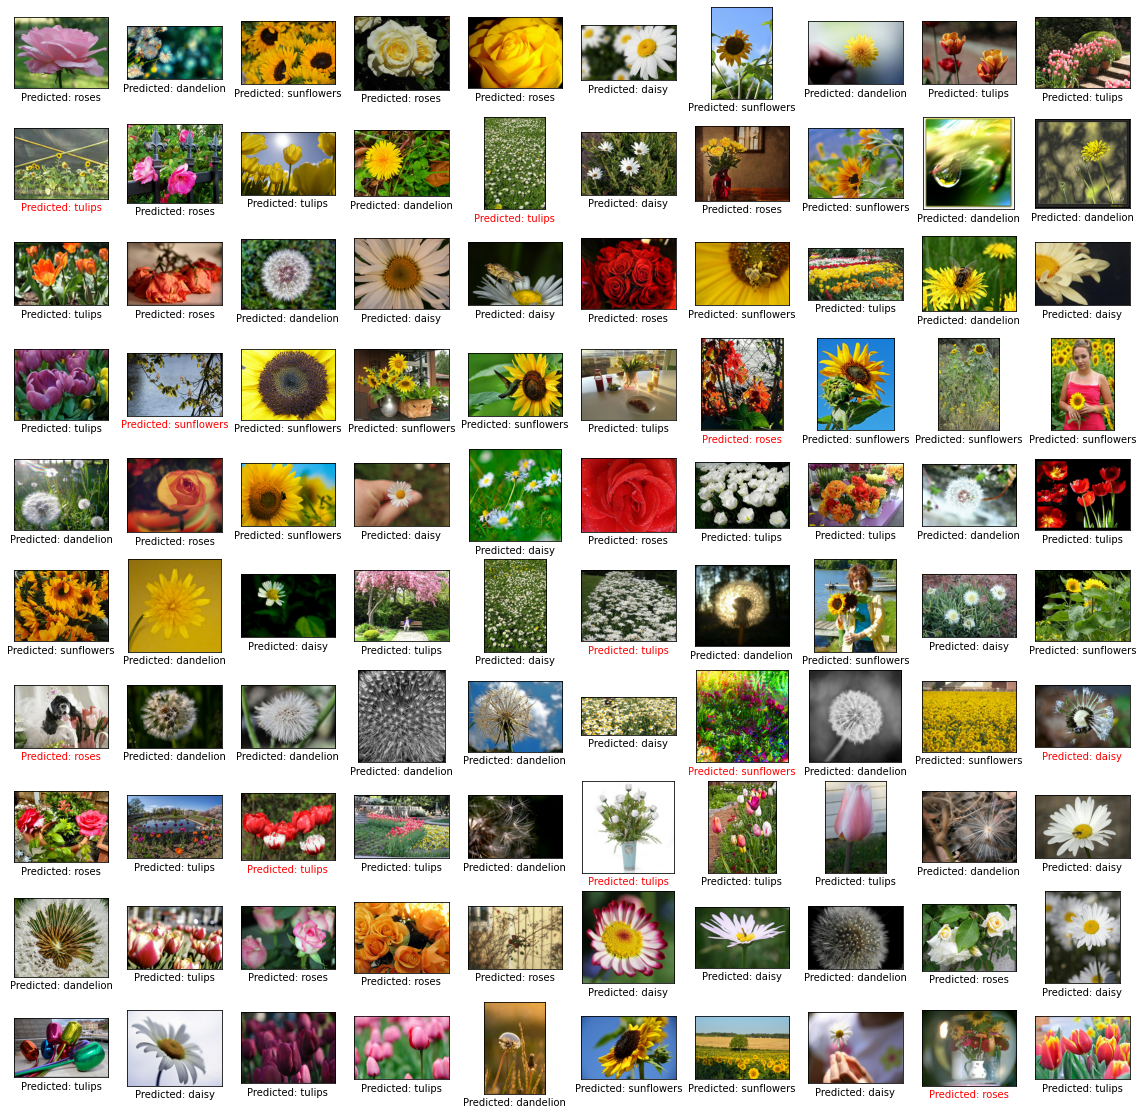

In [16]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the existing model to TensorFlow Lite model format with  [metadata](https://www.tensorflow.org/lite/convert/metadata). The default TFLite filename is `model.tflite`.

In [17]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpto1xnb3t/assets


INFO:tensorflow:Assets written to: /tmp/tmpto1xnb3t/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpxve9u3aa/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpxve9u3aa/labels.txt.


See [example applications and guides of image classification](https://www.tensorflow.org/lite/models/image_classification/overview#example_applications_and_guides) for more details about how to integrate the TensorFlow Lite model into mobile apps.

The allowed export formats can be one or a list of the following:

*   `ExportFormat.TFLITE`
*   `ExportFormat.LABEL`
*   `ExportFormat.SAVED_MODEL`

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

In [18]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [19]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.88235295 0.90588236 0.654902  ]
   [0.9047619  0.92661065 0.6901961 ]
   [0.9238095  0.9434174  0.7226891 ]
   ...
   [0.62801135 0.64705884 0.44985998]
   [0.6464985  0.6610644  0.46162456]
   [0.6778714  0.68571454 0.48963612]]

  [[0.8784314  0.90532213 0.64257705]
   [0.8946779  0.9179272  0.66958785]
   [0.90788317 0.9277711  0.6972789 ]
   ...
   [0.59559834 0.6233294  0.4238896 ]
   [0.6153661  0.63189274 0.43501395]
   [0.6351343  0.65166086 0.45150074]]

  [[0.8767507  0.8969188  0.6313726 ]
   [0.8860344  0.9059624  0.64681876]
   [0.8962785  0.91300523 0.6705082 ]
   ...
   [0.5625451  0.59495807 0.40408167]
   [0.5770308  0.6060024  0.40664262]
   [0.5915968  0.619608   0.41816732]]

  ...

  [[0.22661062 0.38963577 0.292997  ]
   [0.23017195 0.3888754  0.29971957]
   [0.22256893 0.3755101  0.28811494]
   ...
   [0.6220888  0.7318927  0.32797113]
   [0.6267706  0.7348938  0.33573416]
   [0.6367747  0.7413764  0.3439775 ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.88235295 0.90588236 0.654902  ]
   [0.9047619  0.92661065 0.6901961 ]
   [0.9238095  0.9434174  0.7226891 ]
   ...
   [0.62801135 0.64705884 0.44985998]
   [0.6464985  0.6610644  0.46162456]
   [0.6778714  0.68571454 0.48963612]]

  [[0.8784314  0.90532213 0.64257705]
   [0.8946779  0.9179272  0.66958785]
   [0.90788317 0.9277711  0.6972789 ]
   ...
   [0.59559834 0.6233294  0.4238896 ]
   [0.6153661  0.63189274 0.43501395]
   [0.6351343  0.65166086 0.45150074]]

  [[0.8767507  0.8969188  0.6313726 ]
   [0.8860344  0.9059624  0.64681876]
   [0.8962785  0.91300523 0.6705082 ]
   ...
   [0.5625451  0.59495807 0.40408167]
   [0.5770308  0.6060024  0.40664262]
   [0.5915968  0.619608   0.41816732]]

  ...

  [[0.22661062 0.38963577 0.292997  ]
   [0.23017195 0.3888754  0.29971957]
   [0.22256893 0.3755101  0.28811494]
   ...
   [0.6220888  0.7318927  0.32797113]
   [0.6267706  0.7348938  0.33573416]
   [0.6367747  0.7413764  0.3439775 ]]

  [[0.

{'accuracy': 0.9019073569482289}

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create`function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator latency, with little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker supports multiple post-training quantization options. Let's take full integer quantization as an instance. First, define the quantization config to enforce full integer quantization for all ops including the input and output. The input type and output type are `uint8` by default. You may also change them to other types like `int8` by setting `inference_input_type` and `inference_output_type` in config.

In [20]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

Then we export TensorFlow Lite model with such configuration.

In [21]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp99i_5aqy/assets


INFO:tensorflow:Assets written to: /tmp/tmp99i_5aqy/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpqygypnff/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpqygypnff/labels.txt.


In Colab, you can download the model named `model_quant.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to  `mobilenet_v2_spec` in `create` method.

In [22]:
model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5


 1/91 [..............................] - ETA: 4:22 - loss: 1.9872 - accuracy: 0.2188

 3/91 [..............................] - ETA: 2s - loss: 1.9507 - accuracy: 0.2378  

 5/91 [>.............................] - ETA: 2s - loss: 1.9103 - accuracy: 0.2583

 7/91 [=>............................] - ETA: 2s - loss: 1.8602 - accuracy: 0.2782

 9/91 [=>............................] - ETA: 2s - loss: 1.8101 - accuracy: 0.2976

11/91 [==>...........................] - ETA: 2s - loss: 1.7645 - accuracy: 0.3175

13/91 [===>..........................] - ETA: 2s - loss: 1.7223 - accuracy: 0.3355

15/91 [===>..........................] - ETA: 2s - loss: 1.6818 - accuracy: 0.3532

17/91 [====>.........................] - ETA: 2s - loss: 1.6440 - accuracy: 0.3704

19/91 [=====>........................] - ETA: 2s - loss: 1.6091 - accuracy: 0.3865

21/91 [=====>........................] - ETA: 2s - loss: 1.5774 - accuracy: 0.4016

23/91 [======>.......................] - ETA: 2s - loss: 1.5480 - accuracy: 0.4158

25/91 [=======>......................] - ETA: 2s - loss: 1.5209 - accuracy: 0.4293

27/91 [=======>......................] - ETA: 2s - loss: 1.4963 - accuracy: 0.4417

29/91 [========>.....................] - ETA: 2s - loss: 1.4737 - accuracy: 0.4534

31/91 [=========>....................] - ETA: 2s - loss: 1.4530 - accuracy: 0.4643

33/91 [=========>....................] - ETA: 2s - loss: 1.4333 - accuracy: 0.4745

35/91 [==========>...................] - ETA: 2s - loss: 1.4149 - accuracy: 0.4841

37/91 [===========>..................] - ETA: 1s - loss: 1.3976 - accuracy: 0.4932

39/91 [===========>..................] - ETA: 1s - loss: 1.3813 - accuracy: 0.5018

41/91 [============>.................] - ETA: 1s - loss: 1.3659 - accuracy: 0.5102

43/91 [=============>................] - ETA: 1s - loss: 1.3514 - accuracy: 0.5180

45/91 [=============>................] - ETA: 1s - loss: 1.3377 - accuracy: 0.5255

47/91 [==============>...............] - ETA: 1s - loss: 1.3247 - accuracy: 0.5325

49/91 [===============>..............] - ETA: 1s - loss: 1.3124 - accuracy: 0.5393

51/91 [===============>..............] - ETA: 1s - loss: 1.3006 - accuracy: 0.5458

53/91 [================>.............] - ETA: 1s - loss: 1.2895 - accuracy: 0.5519

55/91 [=================>............] - ETA: 1s - loss: 1.2788 - accuracy: 0.5577

57/91 [=================>............] - ETA: 1s - loss: 1.2685 - accuracy: 0.5634

59/91 [==================>...........] - ETA: 1s - loss: 1.2587 - accuracy: 0.5688

61/91 [===================>..........] - ETA: 1s - loss: 1.2495 - accuracy: 0.5740

63/91 [===================>..........] - ETA: 1s - loss: 1.2408 - accuracy: 0.5789

65/91 [====================>.........] - ETA: 0s - loss: 1.2324 - accuracy: 0.5836

67/91 [=====================>........] - ETA: 0s - loss: 1.2244 - accuracy: 0.5881

69/91 [=====================>........] - ETA: 0s - loss: 1.2167 - accuracy: 0.5924

71/91 [======================>.......] - ETA: 0s - loss: 1.2092 - accuracy: 0.5966

73/91 [=======================>......] - ETA: 0s - loss: 1.2021 - accuracy: 0.6006

75/91 [=======================>......] - ETA: 0s - loss: 1.1952 - accuracy: 0.6044

77/91 [========================>.....] - ETA: 0s - loss: 1.1887 - accuracy: 0.6081

79/91 [=========================>....] - ETA: 0s - loss: 1.1824 - accuracy: 0.6117

81/91 [=========================>....] - ETA: 0s - loss: 1.1763 - accuracy: 0.6151

83/91 [==========================>...] - ETA: 0s - loss: 1.1704 - accuracy: 0.6185

85/91 [===========================>..] - ETA: 0s - loss: 1.1647 - accuracy: 0.6218

87/91 [===========================>..] - ETA: 0s - loss: 1.1591 - accuracy: 0.6250

89/91 [============================>.] - ETA: 0s - loss: 1.1536 - accuracy: 0.6281

91/91 [==============================] - ETA: 0s - loss: 1.1483 - accuracy: 0.6311

91/91 [==============================] - 8s 57ms/step - loss: 1.1457 - accuracy: 0.6325 - val_loss: 0.7375 - val_accuracy: 0.8665


Epoch 2/5
 1/91 [..............................] - ETA: 2s - loss: 0.7369 - accuracy: 0.8438

 4/91 [>.............................] - ETA: 2s - loss: 0.7317 - accuracy: 0.8626

 6/91 [>.............................] - ETA: 2s - loss: 0.7319 - accuracy: 0.8617

 8/91 [=>............................] - ETA: 2s - loss: 0.7273 - accuracy: 0.8641

10/91 [==>...........................] - ETA: 2s - loss: 0.7243 - accuracy: 0.8649

12/91 [==>...........................] - ETA: 2s - loss: 0.7210 - accuracy: 0.8675

14/91 [===>..........................] - ETA: 2s - loss: 0.7186 - accuracy: 0.8699

16/91 [====>.........................] - ETA: 2s - loss: 0.7176 - accuracy: 0.8714

18/91 [====>.........................] - ETA: 2s - loss: 0.7164 - accuracy: 0.8725

20/91 [=====>........................] - ETA: 2s - loss: 0.7153 - accuracy: 0.8734

22/91 [======>.......................] - ETA: 2s - loss: 0.7149 - accuracy: 0.8741

24/91 [======>.......................] - ETA: 2s - loss: 0.7141 - accuracy: 0.8749

26/91 [=======>......................] - ETA: 2s - loss: 0.7132 - accuracy: 0.8759

28/91 [========>.....................] - ETA: 2s - loss: 0.7129 - accuracy: 0.8764

30/91 [========>.....................] - ETA: 2s - loss: 0.7127 - accuracy: 0.8768

32/91 [=========>....................] - ETA: 2s - loss: 0.7127 - accuracy: 0.8770

34/91 [==========>...................] - ETA: 2s - loss: 0.7127 - accuracy: 0.8771

36/91 [==========>...................] - ETA: 2s - loss: 0.7127 - accuracy: 0.8771

38/91 [===========>..................] - ETA: 1s - loss: 0.7126 - accuracy: 0.8772

40/91 [============>.................] - ETA: 1s - loss: 0.7123 - accuracy: 0.8773

42/91 [============>.................] - ETA: 1s - loss: 0.7118 - accuracy: 0.8775

44/91 [=============>................] - ETA: 1s - loss: 0.7113 - accuracy: 0.8776

46/91 [==============>...............] - ETA: 1s - loss: 0.7110 - accuracy: 0.8776

48/91 [==============>...............] - ETA: 1s - loss: 0.7107 - accuracy: 0.8775

50/91 [===============>..............] - ETA: 1s - loss: 0.7104 - accuracy: 0.8775

52/91 [================>.............] - ETA: 1s - loss: 0.7101 - accuracy: 0.8775

54/91 [================>.............] - ETA: 1s - loss: 0.7097 - accuracy: 0.8775

56/91 [=================>............] - ETA: 1s - loss: 0.7094 - accuracy: 0.8775

58/91 [==================>...........] - ETA: 1s - loss: 0.7090 - accuracy: 0.8776

60/91 [==================>...........] - ETA: 1s - loss: 0.7086 - accuracy: 0.8776

62/91 [===================>..........] - ETA: 1s - loss: 0.7083 - accuracy: 0.8776

64/91 [====================>.........] - ETA: 0s - loss: 0.7082 - accuracy: 0.8776

66/91 [====================>.........] - ETA: 0s - loss: 0.7080 - accuracy: 0.8776

68/91 [=====================>........] - ETA: 0s - loss: 0.7078 - accuracy: 0.8775

70/91 [======================>.......] - ETA: 0s - loss: 0.7075 - accuracy: 0.8775

72/91 [======================>.......] - ETA: 0s - loss: 0.7073 - accuracy: 0.8775

74/91 [=======================>......] - ETA: 0s - loss: 0.7070 - accuracy: 0.8775

76/91 [========================>.....] - ETA: 0s - loss: 0.7069 - accuracy: 0.8775

78/91 [========================>.....] - ETA: 0s - loss: 0.7068 - accuracy: 0.8774

80/91 [=========================>....] - ETA: 0s - loss: 0.7067 - accuracy: 0.8773

82/91 [==========================>...] - ETA: 0s - loss: 0.7067 - accuracy: 0.8773

84/91 [==========================>...] - ETA: 0s - loss: 0.7066 - accuracy: 0.8772

86/91 [===========================>..] - ETA: 0s - loss: 0.7064 - accuracy: 0.8772

88/91 [============================>.] - ETA: 0s - loss: 0.7063 - accuracy: 0.8772

90/91 [============================>.] - ETA: 0s - loss: 0.7061 - accuracy: 0.8772

91/91 [==============================] - 5s 52ms/step - loss: 0.7060 - accuracy: 0.8772 - val_loss: 0.7154 - val_accuracy: 0.8693


Epoch 3/5
 1/91 [..............................] - ETA: 2s - loss: 0.6655 - accuracy: 0.8750

 4/91 [>.............................] - ETA: 1s - loss: 0.6507 - accuracy: 0.8893

 6/91 [>.............................] - ETA: 2s - loss: 0.6465 - accuracy: 0.8939

 9/91 [=>............................] - ETA: 2s - loss: 0.6431 - accuracy: 0.8983

11/91 [==>...........................] - ETA: 2s - loss: 0.6444 - accuracy: 0.8994

13/91 [===>..........................] - ETA: 2s - loss: 0.6455 - accuracy: 0.9007

15/91 [===>..........................] - ETA: 2s - loss: 0.6474 - accuracy: 0.9011

17/91 [====>.........................] - ETA: 2s - loss: 0.6500 - accuracy: 0.9011

19/91 [=====>........................] - ETA: 2s - loss: 0.6521 - accuracy: 0.9005

21/91 [=====>........................] - ETA: 2s - loss: 0.6542 - accuracy: 0.8995

23/91 [======>.......................] - ETA: 2s - loss: 0.6556 - accuracy: 0.8988

25/91 [=======>......................] - ETA: 2s - loss: 0.6561 - accuracy: 0.8988

27/91 [=======>......................] - ETA: 2s - loss: 0.6563 - accuracy: 0.8990

29/91 [========>.....................] - ETA: 2s - loss: 0.6566 - accuracy: 0.8990

31/91 [=========>....................] - ETA: 2s - loss: 0.6571 - accuracy: 0.8989

33/91 [=========>....................] - ETA: 1s - loss: 0.6577 - accuracy: 0.8987

35/91 [==========>...................] - ETA: 1s - loss: 0.6581 - accuracy: 0.8987

37/91 [===========>..................] - ETA: 1s - loss: 0.6584 - accuracy: 0.8986

39/91 [===========>..................] - ETA: 1s - loss: 0.6585 - accuracy: 0.8987

41/91 [============>.................] - ETA: 1s - loss: 0.6585 - accuracy: 0.8989

43/91 [=============>................] - ETA: 1s - loss: 0.6582 - accuracy: 0.8992

45/91 [=============>................] - ETA: 1s - loss: 0.6578 - accuracy: 0.8996

47/91 [==============>...............] - ETA: 1s - loss: 0.6575 - accuracy: 0.8999

49/91 [===============>..............] - ETA: 1s - loss: 0.6573 - accuracy: 0.9001

51/91 [===============>..............] - ETA: 1s - loss: 0.6571 - accuracy: 0.9003

53/91 [================>.............] - ETA: 1s - loss: 0.6569 - accuracy: 0.9006

55/91 [=================>............] - ETA: 1s - loss: 0.6567 - accuracy: 0.9008

57/91 [=================>............] - ETA: 1s - loss: 0.6564 - accuracy: 0.9010

59/91 [==================>...........] - ETA: 1s - loss: 0.6561 - accuracy: 0.9013

61/91 [===================>..........] - ETA: 1s - loss: 0.6558 - accuracy: 0.9015

63/91 [===================>..........] - ETA: 0s - loss: 0.6555 - accuracy: 0.9017

65/91 [====================>.........] - ETA: 0s - loss: 0.6554 - accuracy: 0.9018

67/91 [=====================>........] - ETA: 0s - loss: 0.6552 - accuracy: 0.9020

69/91 [=====================>........] - ETA: 0s - loss: 0.6551 - accuracy: 0.9022

71/91 [======================>.......] - ETA: 0s - loss: 0.6549 - accuracy: 0.9024

73/91 [=======================>......] - ETA: 0s - loss: 0.6547 - accuracy: 0.9025

75/91 [=======================>......] - ETA: 0s - loss: 0.6546 - accuracy: 0.9027

77/91 [========================>.....] - ETA: 0s - loss: 0.6545 - accuracy: 0.9028

79/91 [=========================>....] - ETA: 0s - loss: 0.6545 - accuracy: 0.9029

81/91 [=========================>....] - ETA: 0s - loss: 0.6545 - accuracy: 0.9029

83/91 [==========================>...] - ETA: 0s - loss: 0.6545 - accuracy: 0.9029

85/91 [===========================>..] - ETA: 0s - loss: 0.6545 - accuracy: 0.9030

87/91 [===========================>..] - ETA: 0s - loss: 0.6544 - accuracy: 0.9031

89/91 [============================>.] - ETA: 0s - loss: 0.6544 - accuracy: 0.9031

91/91 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.9032

91/91 [==============================] - 5s 53ms/step - loss: 0.6543 - accuracy: 0.9032 - val_loss: 0.6931 - val_accuracy: 0.8892


Epoch 4/5
 1/91 [..............................] - ETA: 1s - loss: 0.7129 - accuracy: 0.8438

 4/91 [>.............................] - ETA: 1s - loss: 0.6685 - accuracy: 0.8770

 6/91 [>.............................] - ETA: 2s - loss: 0.6552 - accuracy: 0.8895

 9/91 [=>............................] - ETA: 1s - loss: 0.6433 - accuracy: 0.9001

12/91 [==>...........................] - ETA: 1s - loss: 0.6375 - accuracy: 0.9049

15/91 [===>..........................] - ETA: 1s - loss: 0.6340 - accuracy: 0.9079

18/91 [====>.........................] - ETA: 1s - loss: 0.6330 - accuracy: 0.9100

20/91 [=====>........................] - ETA: 1s - loss: 0.6328 - accuracy: 0.9112

22/91 [======>.......................] - ETA: 1s - loss: 0.6331 - accuracy: 0.9119

24/91 [======>.......................] - ETA: 1s - loss: 0.6331 - accuracy: 0.9126

26/91 [=======>......................] - ETA: 1s - loss: 0.6325 - accuracy: 0.9135

28/91 [========>.....................] - ETA: 1s - loss: 0.6322 - accuracy: 0.9141

30/91 [========>.....................] - ETA: 1s - loss: 0.6320 - accuracy: 0.9144

32/91 [=========>....................] - ETA: 1s - loss: 0.6317 - accuracy: 0.9148

34/91 [==========>...................] - ETA: 1s - loss: 0.6315 - accuracy: 0.9150

36/91 [==========>...................] - ETA: 1s - loss: 0.6315 - accuracy: 0.9152

38/91 [===========>..................] - ETA: 1s - loss: 0.6314 - accuracy: 0.9154

40/91 [============>.................] - ETA: 1s - loss: 0.6313 - accuracy: 0.9155

42/91 [============>.................] - ETA: 1s - loss: 0.6311 - accuracy: 0.9158

44/91 [=============>................] - ETA: 1s - loss: 0.6307 - accuracy: 0.9162

46/91 [==============>...............] - ETA: 1s - loss: 0.6304 - accuracy: 0.9165

48/91 [==============>...............] - ETA: 1s - loss: 0.6301 - accuracy: 0.9167

50/91 [===============>..............] - ETA: 1s - loss: 0.6300 - accuracy: 0.9169

52/91 [================>.............] - ETA: 1s - loss: 0.6298 - accuracy: 0.9172

54/91 [================>.............] - ETA: 1s - loss: 0.6296 - accuracy: 0.9174

56/91 [=================>............] - ETA: 1s - loss: 0.6294 - accuracy: 0.9177

58/91 [==================>...........] - ETA: 1s - loss: 0.6291 - accuracy: 0.9179

60/91 [==================>...........] - ETA: 0s - loss: 0.6288 - accuracy: 0.9182

62/91 [===================>..........] - ETA: 0s - loss: 0.6286 - accuracy: 0.9185

64/91 [====================>.........] - ETA: 0s - loss: 0.6285 - accuracy: 0.9186

66/91 [====================>.........] - ETA: 0s - loss: 0.6284 - accuracy: 0.9187

68/91 [=====================>........] - ETA: 0s - loss: 0.6283 - accuracy: 0.9188

70/91 [======================>.......] - ETA: 0s - loss: 0.6282 - accuracy: 0.9189

72/91 [======================>.......] - ETA: 0s - loss: 0.6281 - accuracy: 0.9189

74/91 [=======================>......] - ETA: 0s - loss: 0.6281 - accuracy: 0.9190

76/91 [========================>.....] - ETA: 0s - loss: 0.6280 - accuracy: 0.9190

78/91 [========================>.....] - ETA: 0s - loss: 0.6280 - accuracy: 0.9190

80/91 [=========================>....] - ETA: 0s - loss: 0.6280 - accuracy: 0.9190

82/91 [==========================>...] - ETA: 0s - loss: 0.6281 - accuracy: 0.9190

84/91 [==========================>...] - ETA: 0s - loss: 0.6281 - accuracy: 0.9190

86/91 [===========================>..] - ETA: 0s - loss: 0.6281 - accuracy: 0.9191

88/91 [============================>.] - ETA: 0s - loss: 0.6281 - accuracy: 0.9191

90/91 [============================>.] - ETA: 0s - loss: 0.6281 - accuracy: 0.9191

91/91 [==============================] - 5s 53ms/step - loss: 0.6281 - accuracy: 0.9191 - val_loss: 0.6837 - val_accuracy: 0.8807


Epoch 5/5
 1/91 [..............................] - ETA: 1s - loss: 0.7026 - accuracy: 0.8438

 4/91 [>.............................] - ETA: 2s - loss: 0.6655 - accuracy: 0.8887

 7/91 [=>............................] - ETA: 1s - loss: 0.6539 - accuracy: 0.8908

10/91 [==>...........................] - ETA: 1s - loss: 0.6445 - accuracy: 0.8949

12/91 [==>...........................] - ETA: 1s - loss: 0.6398 - accuracy: 0.8972

15/91 [===>..........................] - ETA: 1s - loss: 0.6334 - accuracy: 0.9014

18/91 [====>.........................] - ETA: 1s - loss: 0.6304 - accuracy: 0.9038

20/91 [=====>........................] - ETA: 1s - loss: 0.6292 - accuracy: 0.9052

23/91 [======>.......................] - ETA: 1s - loss: 0.6278 - accuracy: 0.9067

26/91 [=======>......................] - ETA: 1s - loss: 0.6262 - accuracy: 0.9083

29/91 [========>.....................] - ETA: 1s - loss: 0.6244 - accuracy: 0.9099

31/91 [=========>....................] - ETA: 1s - loss: 0.6235 - accuracy: 0.9107

33/91 [=========>....................] - ETA: 1s - loss: 0.6226 - accuracy: 0.9114

36/91 [==========>...................] - ETA: 1s - loss: 0.6217 - accuracy: 0.9123

39/91 [===========>..................] - ETA: 1s - loss: 0.6213 - accuracy: 0.9127

41/91 [============>.................] - ETA: 1s - loss: 0.6210 - accuracy: 0.9131

43/91 [=============>................] - ETA: 1s - loss: 0.6204 - accuracy: 0.9136

45/91 [=============>................] - ETA: 1s - loss: 0.6198 - accuracy: 0.9141

47/91 [==============>...............] - ETA: 1s - loss: 0.6192 - accuracy: 0.9147

49/91 [===============>..............] - ETA: 1s - loss: 0.6187 - accuracy: 0.9152

51/91 [===============>..............] - ETA: 1s - loss: 0.6182 - accuracy: 0.9157

53/91 [================>.............] - ETA: 1s - loss: 0.6177 - accuracy: 0.9162

55/91 [=================>............] - ETA: 0s - loss: 0.6172 - accuracy: 0.9166

57/91 [=================>............] - ETA: 0s - loss: 0.6168 - accuracy: 0.9169

59/91 [==================>...........] - ETA: 0s - loss: 0.6164 - accuracy: 0.9172

61/91 [===================>..........] - ETA: 0s - loss: 0.6160 - accuracy: 0.9176

63/91 [===================>..........] - ETA: 0s - loss: 0.6155 - accuracy: 0.9178

65/91 [====================>.........] - ETA: 0s - loss: 0.6152 - accuracy: 0.9180

67/91 [=====================>........] - ETA: 0s - loss: 0.6149 - accuracy: 0.9182

69/91 [=====================>........] - ETA: 0s - loss: 0.6147 - accuracy: 0.9184

71/91 [======================>.......] - ETA: 0s - loss: 0.6145 - accuracy: 0.9185

73/91 [=======================>......] - ETA: 0s - loss: 0.6142 - accuracy: 0.9187

75/91 [=======================>......] - ETA: 0s - loss: 0.6140 - accuracy: 0.9188

77/91 [========================>.....] - ETA: 0s - loss: 0.6138 - accuracy: 0.9189

79/91 [=========================>....] - ETA: 0s - loss: 0.6136 - accuracy: 0.9191

81/91 [=========================>....] - ETA: 0s - loss: 0.6135 - accuracy: 0.9191

83/91 [==========================>...] - ETA: 0s - loss: 0.6134 - accuracy: 0.9191

85/91 [===========================>..] - ETA: 0s - loss: 0.6133 - accuracy: 0.9192

87/91 [===========================>..] - ETA: 0s - loss: 0.6132 - accuracy: 0.9193

89/91 [============================>.] - ETA: 0s - loss: 0.6130 - accuracy: 0.9194

91/91 [==============================] - ETA: 0s - loss: 0.6129 - accuracy: 0.9194

91/91 [==============================] - 5s 56ms/step - loss: 0.6128 - accuracy: 0.9195 - val_loss: 0.7051 - val_accuracy: 0.8750


Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [23]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 12s - loss: 0.7617 - accuracy: 0.8750

 3/12 [======>.......................] - ETA: 0s - loss: 0.6707 - accuracy: 0.8958 

 5/12 [===========>..................] - ETA: 0s - loss: 0.6450 - accuracy: 0.9125

 7/12 [================>.............] - ETA: 0s - loss: 0.6506 - accuracy: 0.9062

 9/12 [=====================>........] - ETA: 0s - loss: 0.6773 - accuracy: 0.8958

11/12 [==========================>...] - ETA: 0s - loss: 0.6671 - accuracy: 0.8920

12/12 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.8937

12/12 [==============================] - 2s 39ms/step - loss: 0.6626 - accuracy: 0.8937


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of `ImageModelSpec` and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [24]:
inception_v3_spec = model_spec.ImageModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ImageModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.


In [25]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


 1/91 [..............................] - ETA: 2:38 - loss: 1.6939 - accuracy: 0.2812

 2/91 [..............................] - ETA: 4s - loss: 1.7032 - accuracy: 0.2812  

 4/91 [>.............................] - ETA: 4s - loss: 1.6964 - accuracy: 0.2923

 6/91 [>.............................] - ETA: 3s - loss: 1.6896 - accuracy: 0.2978

 8/91 [=>............................] - ETA: 3s - loss: 1.6736 - accuracy: 0.3035

10/91 [==>...........................] - ETA: 3s - loss: 1.6533 - accuracy: 0.3138

12/91 [==>...........................] - ETA: 3s - loss: 1.6301 - accuracy: 0.3255

14/91 [===>..........................] - ETA: 3s - loss: 1.6086 - accuracy: 0.3370

16/91 [====>.........................] - ETA: 2s - loss: 1.5864 - accuracy: 0.3499

18/91 [====>.........................] - ETA: 2s - loss: 1.5643 - accuracy: 0.3625

20/91 [=====>........................] - ETA: 2s - loss: 1.5429 - accuracy: 0.3743

22/91 [======>.......................] - ETA: 2s - loss: 1.5218 - accuracy: 0.3860

24/91 [======>.......................] - ETA: 2s - loss: 1.5008 - accuracy: 0.3978

26/91 [=======>......................] - ETA: 2s - loss: 1.4810 - accuracy: 0.4092

28/91 [========>.....................] - ETA: 2s - loss: 1.4621 - accuracy: 0.4202

30/91 [========>.....................] - ETA: 2s - loss: 1.4444 - accuracy: 0.4304

32/91 [=========>....................] - ETA: 2s - loss: 1.4278 - accuracy: 0.4400

34/91 [==========>...................] - ETA: 2s - loss: 1.4120 - accuracy: 0.4492

36/91 [==========>...................] - ETA: 2s - loss: 1.3967 - accuracy: 0.4583

38/91 [===========>..................] - ETA: 2s - loss: 1.3822 - accuracy: 0.4669

40/91 [============>.................] - ETA: 1s - loss: 1.3682 - accuracy: 0.4752

42/91 [============>.................] - ETA: 1s - loss: 1.3548 - accuracy: 0.4831

44/91 [=============>................] - ETA: 1s - loss: 1.3420 - accuracy: 0.4907

46/91 [==============>...............] - ETA: 1s - loss: 1.3297 - accuracy: 0.4979

48/91 [==============>...............] - ETA: 1s - loss: 1.3179 - accuracy: 0.5049

50/91 [===============>..............] - ETA: 1s - loss: 1.3066 - accuracy: 0.5116

52/91 [================>.............] - ETA: 1s - loss: 1.2956 - accuracy: 0.5180

54/91 [================>.............] - ETA: 1s - loss: 1.2850 - accuracy: 0.5242

56/91 [=================>............] - ETA: 1s - loss: 1.2747 - accuracy: 0.5302

58/91 [==================>...........] - ETA: 1s - loss: 1.2649 - accuracy: 0.5360

60/91 [==================>...........] - ETA: 1s - loss: 1.2555 - accuracy: 0.5415

62/91 [===================>..........] - ETA: 1s - loss: 1.2465 - accuracy: 0.5468

64/91 [====================>.........] - ETA: 1s - loss: 1.2378 - accuracy: 0.5520

66/91 [====================>.........] - ETA: 0s - loss: 1.2294 - accuracy: 0.5570

68/91 [=====================>........] - ETA: 0s - loss: 1.2212 - accuracy: 0.5619

70/91 [======================>.......] - ETA: 0s - loss: 1.2133 - accuracy: 0.5665

72/91 [======================>.......] - ETA: 0s - loss: 1.2056 - accuracy: 0.5711

74/91 [=======================>......] - ETA: 0s - loss: 1.1982 - accuracy: 0.5756

76/91 [========================>.....] - ETA: 0s - loss: 1.1910 - accuracy: 0.5799

78/91 [========================>.....] - ETA: 0s - loss: 1.1842 - accuracy: 0.5840

80/91 [=========================>....] - ETA: 0s - loss: 1.1776 - accuracy: 0.5879

82/91 [==========================>...] - ETA: 0s - loss: 1.1711 - accuracy: 0.5917

84/91 [==========================>...] - ETA: 0s - loss: 1.1649 - accuracy: 0.5955

86/91 [===========================>..] - ETA: 0s - loss: 1.1588 - accuracy: 0.5991

88/91 [============================>.] - ETA: 0s - loss: 1.1530 - accuracy: 0.6026

90/91 [============================>.] - ETA: 0s - loss: 1.1472 - accuracy: 0.6061

91/91 [==============================] - 7s 57ms/step - loss: 1.1417 - accuracy: 0.6093 - val_loss: 0.7117 - val_accuracy: 0.8722


Epoch 2/10
 1/91 [..............................] - ETA: 1s - loss: 0.7340 - accuracy: 0.7500

 4/91 [>.............................] - ETA: 2s - loss: 0.7196 - accuracy: 0.8158

 6/91 [>.............................] - ETA: 2s - loss: 0.7086 - accuracy: 0.8343

 8/91 [=>............................] - ETA: 2s - loss: 0.6996 - accuracy: 0.8450

10/91 [==>...........................] - ETA: 2s - loss: 0.6935 - accuracy: 0.8530

12/91 [==>...........................] - ETA: 2s - loss: 0.6890 - accuracy: 0.8587

14/91 [===>..........................] - ETA: 2s - loss: 0.6862 - accuracy: 0.8630

16/91 [====>.........................] - ETA: 2s - loss: 0.6836 - accuracy: 0.8666

18/91 [====>.........................] - ETA: 2s - loss: 0.6807 - accuracy: 0.8700

20/91 [=====>........................] - ETA: 2s - loss: 0.6782 - accuracy: 0.8729

22/91 [======>.......................] - ETA: 2s - loss: 0.6760 - accuracy: 0.8750

24/91 [======>.......................] - ETA: 2s - loss: 0.6737 - accuracy: 0.8771

26/91 [=======>......................] - ETA: 2s - loss: 0.6718 - accuracy: 0.8790

28/91 [========>.....................] - ETA: 2s - loss: 0.6700 - accuracy: 0.8808

30/91 [========>.....................] - ETA: 2s - loss: 0.6687 - accuracy: 0.8823

32/91 [=========>....................] - ETA: 2s - loss: 0.6677 - accuracy: 0.8836

34/91 [==========>...................] - ETA: 2s - loss: 0.6668 - accuracy: 0.8845

36/91 [==========>...................] - ETA: 2s - loss: 0.6662 - accuracy: 0.8852

38/91 [===========>..................] - ETA: 1s - loss: 0.6656 - accuracy: 0.8860

40/91 [============>.................] - ETA: 1s - loss: 0.6650 - accuracy: 0.8866

42/91 [============>.................] - ETA: 1s - loss: 0.6645 - accuracy: 0.8872

44/91 [=============>................] - ETA: 1s - loss: 0.6639 - accuracy: 0.8876

46/91 [==============>...............] - ETA: 1s - loss: 0.6635 - accuracy: 0.8881

48/91 [==============>...............] - ETA: 1s - loss: 0.6631 - accuracy: 0.8884

50/91 [===============>..............] - ETA: 1s - loss: 0.6627 - accuracy: 0.8888

52/91 [================>.............] - ETA: 1s - loss: 0.6624 - accuracy: 0.8892

54/91 [================>.............] - ETA: 1s - loss: 0.6620 - accuracy: 0.8896

56/91 [=================>............] - ETA: 1s - loss: 0.6616 - accuracy: 0.8899

58/91 [==================>...........] - ETA: 1s - loss: 0.6612 - accuracy: 0.8903

60/91 [==================>...........] - ETA: 1s - loss: 0.6608 - accuracy: 0.8906

62/91 [===================>..........] - ETA: 1s - loss: 0.6606 - accuracy: 0.8908

64/91 [====================>.........] - ETA: 1s - loss: 0.6603 - accuracy: 0.8911

66/91 [====================>.........] - ETA: 0s - loss: 0.6600 - accuracy: 0.8913

68/91 [=====================>........] - ETA: 0s - loss: 0.6597 - accuracy: 0.8916

70/91 [======================>.......] - ETA: 0s - loss: 0.6593 - accuracy: 0.8919

72/91 [======================>.......] - ETA: 0s - loss: 0.6590 - accuracy: 0.8922

74/91 [=======================>......] - ETA: 0s - loss: 0.6586 - accuracy: 0.8925

76/91 [========================>.....] - ETA: 0s - loss: 0.6582 - accuracy: 0.8928

78/91 [========================>.....] - ETA: 0s - loss: 0.6579 - accuracy: 0.8931

80/91 [=========================>....] - ETA: 0s - loss: 0.6577 - accuracy: 0.8934

82/91 [==========================>...] - ETA: 0s - loss: 0.6575 - accuracy: 0.8936

84/91 [==========================>...] - ETA: 0s - loss: 0.6572 - accuracy: 0.8938

86/91 [===========================>..] - ETA: 0s - loss: 0.6570 - accuracy: 0.8940

88/91 [============================>.] - ETA: 0s - loss: 0.6568 - accuracy: 0.8942

90/91 [============================>.] - ETA: 0s - loss: 0.6565 - accuracy: 0.8944

91/91 [==============================] - 5s 52ms/step - loss: 0.6563 - accuracy: 0.8946 - val_loss: 0.6765 - val_accuracy: 0.8920


Epoch 3/10
 1/91 [..............................] - ETA: 2s - loss: 0.6285 - accuracy: 0.8438

 4/91 [>.............................] - ETA: 2s - loss: 0.6606 - accuracy: 0.8509

 7/91 [=>............................] - ETA: 2s - loss: 0.6539 - accuracy: 0.8682

10/91 [==>...........................] - ETA: 2s - loss: 0.6497 - accuracy: 0.8772

12/91 [==>...........................] - ETA: 2s - loss: 0.6466 - accuracy: 0.8822

14/91 [===>..........................] - ETA: 2s - loss: 0.6442 - accuracy: 0.8866

16/91 [====>.........................] - ETA: 2s - loss: 0.6426 - accuracy: 0.8901

18/91 [====>.........................] - ETA: 2s - loss: 0.6407 - accuracy: 0.8933

20/91 [=====>........................] - ETA: 2s - loss: 0.6393 - accuracy: 0.8959

22/91 [======>.......................] - ETA: 2s - loss: 0.6380 - accuracy: 0.8980

24/91 [======>.......................] - ETA: 2s - loss: 0.6366 - accuracy: 0.9000

26/91 [=======>......................] - ETA: 2s - loss: 0.6351 - accuracy: 0.9018

28/91 [========>.....................] - ETA: 2s - loss: 0.6338 - accuracy: 0.9035

30/91 [========>.....................] - ETA: 2s - loss: 0.6327 - accuracy: 0.9050

32/91 [=========>....................] - ETA: 2s - loss: 0.6320 - accuracy: 0.9062

34/91 [==========>...................] - ETA: 1s - loss: 0.6314 - accuracy: 0.9071

36/91 [==========>...................] - ETA: 1s - loss: 0.6307 - accuracy: 0.9080

38/91 [===========>..................] - ETA: 1s - loss: 0.6302 - accuracy: 0.9089

40/91 [============>.................] - ETA: 1s - loss: 0.6297 - accuracy: 0.9096

42/91 [============>.................] - ETA: 1s - loss: 0.6291 - accuracy: 0.9104

44/91 [=============>................] - ETA: 1s - loss: 0.6286 - accuracy: 0.9111

46/91 [==============>...............] - ETA: 1s - loss: 0.6281 - accuracy: 0.9118

48/91 [==============>...............] - ETA: 1s - loss: 0.6277 - accuracy: 0.9124

50/91 [===============>..............] - ETA: 1s - loss: 0.6273 - accuracy: 0.9129

52/91 [================>.............] - ETA: 1s - loss: 0.6269 - accuracy: 0.9135

54/91 [================>.............] - ETA: 1s - loss: 0.6266 - accuracy: 0.9139

56/91 [=================>............] - ETA: 1s - loss: 0.6263 - accuracy: 0.9144

58/91 [==================>...........] - ETA: 1s - loss: 0.6260 - accuracy: 0.9148

60/91 [==================>...........] - ETA: 1s - loss: 0.6257 - accuracy: 0.9151

62/91 [===================>..........] - ETA: 1s - loss: 0.6255 - accuracy: 0.9154

64/91 [====================>.........] - ETA: 0s - loss: 0.6252 - accuracy: 0.9157

66/91 [====================>.........] - ETA: 0s - loss: 0.6250 - accuracy: 0.9159

68/91 [=====================>........] - ETA: 0s - loss: 0.6247 - accuracy: 0.9161

70/91 [======================>.......] - ETA: 0s - loss: 0.6244 - accuracy: 0.9164

72/91 [======================>.......] - ETA: 0s - loss: 0.6242 - accuracy: 0.9166

74/91 [=======================>......] - ETA: 0s - loss: 0.6239 - accuracy: 0.9168

76/91 [========================>.....] - ETA: 0s - loss: 0.6236 - accuracy: 0.9171

78/91 [========================>.....] - ETA: 0s - loss: 0.6233 - accuracy: 0.9173

80/91 [=========================>....] - ETA: 0s - loss: 0.6232 - accuracy: 0.9174

82/91 [==========================>...] - ETA: 0s - loss: 0.6230 - accuracy: 0.9175

84/91 [==========================>...] - ETA: 0s - loss: 0.6228 - accuracy: 0.9176

86/91 [===========================>..] - ETA: 0s - loss: 0.6227 - accuracy: 0.9178

88/91 [============================>.] - ETA: 0s - loss: 0.6225 - accuracy: 0.9179

90/91 [============================>.] - ETA: 0s - loss: 0.6224 - accuracy: 0.9180

91/91 [==============================] - 5s 53ms/step - loss: 0.6222 - accuracy: 0.9181 - val_loss: 0.6662 - val_accuracy: 0.8892


Epoch 4/10
 1/91 [..............................] - ETA: 2s - loss: 0.6717 - accuracy: 0.8438

 4/91 [>.............................] - ETA: 2s - loss: 0.6559 - accuracy: 0.8783

 7/91 [=>............................] - ETA: 1s - loss: 0.6494 - accuracy: 0.8841

10/91 [==>...........................] - ETA: 1s - loss: 0.6415 - accuracy: 0.8897

12/91 [==>...........................] - ETA: 1s - loss: 0.6389 - accuracy: 0.8927

15/91 [===>..........................] - ETA: 1s - loss: 0.6339 - accuracy: 0.8978

17/91 [====>.........................] - ETA: 1s - loss: 0.6310 - accuracy: 0.9004

20/91 [=====>........................] - ETA: 1s - loss: 0.6270 - accuracy: 0.9039

22/91 [======>.......................] - ETA: 1s - loss: 0.6253 - accuracy: 0.9054

24/91 [======>.......................] - ETA: 1s - loss: 0.6237 - accuracy: 0.9067

26/91 [=======>......................] - ETA: 1s - loss: 0.6222 - accuracy: 0.9079

28/91 [========>.....................] - ETA: 1s - loss: 0.6207 - accuracy: 0.9089

30/91 [========>.....................] - ETA: 1s - loss: 0.6195 - accuracy: 0.9099

32/91 [=========>....................] - ETA: 1s - loss: 0.6183 - accuracy: 0.9107

34/91 [==========>...................] - ETA: 1s - loss: 0.6175 - accuracy: 0.9113

36/91 [==========>...................] - ETA: 1s - loss: 0.6167 - accuracy: 0.9120

38/91 [===========>..................] - ETA: 1s - loss: 0.6159 - accuracy: 0.9126

40/91 [============>.................] - ETA: 1s - loss: 0.6151 - accuracy: 0.9132

42/91 [============>.................] - ETA: 1s - loss: 0.6144 - accuracy: 0.9137

44/91 [=============>................] - ETA: 1s - loss: 0.6136 - accuracy: 0.9142

46/91 [==============>...............] - ETA: 1s - loss: 0.6129 - accuracy: 0.9147

48/91 [==============>...............] - ETA: 1s - loss: 0.6123 - accuracy: 0.9151

50/91 [===============>..............] - ETA: 1s - loss: 0.6117 - accuracy: 0.9155

52/91 [================>.............] - ETA: 1s - loss: 0.6113 - accuracy: 0.9159

54/91 [================>.............] - ETA: 1s - loss: 0.6109 - accuracy: 0.9162

56/91 [=================>............] - ETA: 1s - loss: 0.6106 - accuracy: 0.9165

58/91 [==================>...........] - ETA: 1s - loss: 0.6102 - accuracy: 0.9168

60/91 [==================>...........] - ETA: 0s - loss: 0.6099 - accuracy: 0.9171

62/91 [===================>..........] - ETA: 0s - loss: 0.6096 - accuracy: 0.9173

64/91 [====================>.........] - ETA: 0s - loss: 0.6093 - accuracy: 0.9174

66/91 [====================>.........] - ETA: 0s - loss: 0.6090 - accuracy: 0.9176

68/91 [=====================>........] - ETA: 0s - loss: 0.6088 - accuracy: 0.9178

70/91 [======================>.......] - ETA: 0s - loss: 0.6085 - accuracy: 0.9180

72/91 [======================>.......] - ETA: 0s - loss: 0.6082 - accuracy: 0.9181

74/91 [=======================>......] - ETA: 0s - loss: 0.6079 - accuracy: 0.9183

76/91 [========================>.....] - ETA: 0s - loss: 0.6076 - accuracy: 0.9185

78/91 [========================>.....] - ETA: 0s - loss: 0.6073 - accuracy: 0.9187

80/91 [=========================>....] - ETA: 0s - loss: 0.6071 - accuracy: 0.9189

82/91 [==========================>...] - ETA: 0s - loss: 0.6069 - accuracy: 0.9190

84/91 [==========================>...] - ETA: 0s - loss: 0.6067 - accuracy: 0.9191

86/91 [===========================>..] - ETA: 0s - loss: 0.6066 - accuracy: 0.9192

88/91 [============================>.] - ETA: 0s - loss: 0.6064 - accuracy: 0.9193

90/91 [============================>.] - ETA: 0s - loss: 0.6063 - accuracy: 0.9194

91/91 [==============================] - 5s 53ms/step - loss: 0.6062 - accuracy: 0.9195 - val_loss: 0.6550 - val_accuracy: 0.8892


Epoch 5/10
 1/91 [..............................] - ETA: 1s - loss: 0.5854 - accuracy: 0.9375

 3/91 [..............................] - ETA: 2s - loss: 0.5976 - accuracy: 0.9288

 6/91 [>.............................] - ETA: 1s - loss: 0.5976 - accuracy: 0.9312

 8/91 [=>............................] - ETA: 1s - loss: 0.5964 - accuracy: 0.9323

11/91 [==>...........................] - ETA: 1s - loss: 0.5930 - accuracy: 0.9343

13/91 [===>..........................] - ETA: 1s - loss: 0.5914 - accuracy: 0.9359

15/91 [===>..........................] - ETA: 1s - loss: 0.5890 - accuracy: 0.9379

17/91 [====>.........................] - ETA: 1s - loss: 0.5879 - accuracy: 0.9387

19/91 [=====>........................] - ETA: 1s - loss: 0.5872 - accuracy: 0.9391

21/91 [=====>........................] - ETA: 1s - loss: 0.5865 - accuracy: 0.9394

23/91 [======>.......................] - ETA: 1s - loss: 0.5861 - accuracy: 0.9394

25/91 [=======>......................] - ETA: 1s - loss: 0.5854 - accuracy: 0.9398

28/91 [========>.....................] - ETA: 1s - loss: 0.5840 - accuracy: 0.9407

31/91 [=========>....................] - ETA: 1s - loss: 0.5829 - accuracy: 0.9416

33/91 [=========>....................] - ETA: 1s - loss: 0.5824 - accuracy: 0.9419

36/91 [==========>...................] - ETA: 1s - loss: 0.5819 - accuracy: 0.9421

38/91 [===========>..................] - ETA: 1s - loss: 0.5816 - accuracy: 0.9422

41/91 [============>.................] - ETA: 1s - loss: 0.5812 - accuracy: 0.9423

44/91 [=============>................] - ETA: 1s - loss: 0.5807 - accuracy: 0.9424

46/91 [==============>...............] - ETA: 1s - loss: 0.5803 - accuracy: 0.9426

48/91 [==============>...............] - ETA: 1s - loss: 0.5801 - accuracy: 0.9428

50/91 [===============>..............] - ETA: 1s - loss: 0.5799 - accuracy: 0.9429

52/91 [================>.............] - ETA: 1s - loss: 0.5797 - accuracy: 0.9430

54/91 [================>.............] - ETA: 0s - loss: 0.5795 - accuracy: 0.9431

56/91 [=================>............] - ETA: 0s - loss: 0.5794 - accuracy: 0.9432

58/91 [==================>...........] - ETA: 0s - loss: 0.5793 - accuracy: 0.9433

60/91 [==================>...........] - ETA: 0s - loss: 0.5792 - accuracy: 0.9433

62/91 [===================>..........] - ETA: 0s - loss: 0.5791 - accuracy: 0.9433

64/91 [====================>.........] - ETA: 0s - loss: 0.5791 - accuracy: 0.9433

66/91 [====================>.........] - ETA: 0s - loss: 0.5791 - accuracy: 0.9432

68/91 [=====================>........] - ETA: 0s - loss: 0.5791 - accuracy: 0.9432

70/91 [======================>.......] - ETA: 0s - loss: 0.5791 - accuracy: 0.9432

72/91 [======================>.......] - ETA: 0s - loss: 0.5790 - accuracy: 0.9432

74/91 [=======================>......] - ETA: 0s - loss: 0.5789 - accuracy: 0.9432

76/91 [========================>.....] - ETA: 0s - loss: 0.5789 - accuracy: 0.9431

78/91 [========================>.....] - ETA: 0s - loss: 0.5788 - accuracy: 0.9431

80/91 [=========================>....] - ETA: 0s - loss: 0.5788 - accuracy: 0.9431

82/91 [==========================>...] - ETA: 0s - loss: 0.5788 - accuracy: 0.9430

84/91 [==========================>...] - ETA: 0s - loss: 0.5789 - accuracy: 0.9429

86/91 [===========================>..] - ETA: 0s - loss: 0.5789 - accuracy: 0.9429

88/91 [============================>.] - ETA: 0s - loss: 0.5789 - accuracy: 0.9428

90/91 [============================>.] - ETA: 0s - loss: 0.5790 - accuracy: 0.9427

91/91 [==============================] - 5s 55ms/step - loss: 0.5790 - accuracy: 0.9426 - val_loss: 0.6467 - val_accuracy: 0.8949


Epoch 6/10
 1/91 [..............................] - ETA: 1s - loss: 0.5366 - accuracy: 1.0000

 3/91 [..............................] - ETA: 2s - loss: 0.5615 - accuracy: 0.9705

 5/91 [>.............................] - ETA: 2s - loss: 0.5741 - accuracy: 0.9532

 7/91 [=>............................] - ETA: 2s - loss: 0.5820 - accuracy: 0.9426

 9/91 [=>............................] - ETA: 2s - loss: 0.5853 - accuracy: 0.9369

11/91 [==>...........................] - ETA: 2s - loss: 0.5878 - accuracy: 0.9340

14/91 [===>..........................] - ETA: 2s - loss: 0.5890 - accuracy: 0.9332

17/91 [====>.........................] - ETA: 1s - loss: 0.5883 - accuracy: 0.9338

19/91 [=====>........................] - ETA: 1s - loss: 0.5877 - accuracy: 0.9345

22/91 [======>.......................] - ETA: 1s - loss: 0.5865 - accuracy: 0.9354

24/91 [======>.......................] - ETA: 1s - loss: 0.5861 - accuracy: 0.9358

26/91 [=======>......................] - ETA: 1s - loss: 0.5853 - accuracy: 0.9364

29/91 [========>.....................] - ETA: 1s - loss: 0.5838 - accuracy: 0.9375

32/91 [=========>....................] - ETA: 1s - loss: 0.5823 - accuracy: 0.9385

35/91 [==========>...................] - ETA: 1s - loss: 0.5812 - accuracy: 0.9391

38/91 [===========>..................] - ETA: 1s - loss: 0.5804 - accuracy: 0.9395

40/91 [============>.................] - ETA: 1s - loss: 0.5799 - accuracy: 0.9397

43/91 [=============>................] - ETA: 1s - loss: 0.5792 - accuracy: 0.9401

46/91 [==============>...............] - ETA: 1s - loss: 0.5785 - accuracy: 0.9405

49/91 [===============>..............] - ETA: 1s - loss: 0.5779 - accuracy: 0.9408

52/91 [================>.............] - ETA: 0s - loss: 0.5773 - accuracy: 0.9411

55/91 [=================>............] - ETA: 0s - loss: 0.5769 - accuracy: 0.9414

58/91 [==================>...........] - ETA: 0s - loss: 0.5766 - accuracy: 0.9415

60/91 [==================>...........] - ETA: 0s - loss: 0.5764 - accuracy: 0.9415

63/91 [===================>..........] - ETA: 0s - loss: 0.5761 - accuracy: 0.9415

66/91 [====================>.........] - ETA: 0s - loss: 0.5759 - accuracy: 0.9415

69/91 [=====================>........] - ETA: 0s - loss: 0.5758 - accuracy: 0.9416

72/91 [======================>.......] - ETA: 0s - loss: 0.5755 - accuracy: 0.9417

75/91 [=======================>......] - ETA: 0s - loss: 0.5753 - accuracy: 0.9418

78/91 [========================>.....] - ETA: 0s - loss: 0.5751 - accuracy: 0.9419

81/91 [=========================>....] - ETA: 0s - loss: 0.5750 - accuracy: 0.9420

84/91 [==========================>...] - ETA: 0s - loss: 0.5749 - accuracy: 0.9420

87/91 [===========================>..] - ETA: 0s - loss: 0.5749 - accuracy: 0.9420

90/91 [============================>.] - ETA: 0s - loss: 0.5749 - accuracy: 0.9420

91/91 [==============================] - 4s 47ms/step - loss: 0.5749 - accuracy: 0.9419 - val_loss: 0.6410 - val_accuracy: 0.8977


Epoch 7/10
 1/91 [..............................] - ETA: 1s - loss: 0.5018 - accuracy: 1.0000

 3/91 [..............................] - ETA: 2s - loss: 0.5257 - accuracy: 0.9774

 5/91 [>.............................] - ETA: 2s - loss: 0.5408 - accuracy: 0.9630

 8/91 [=>............................] - ETA: 2s - loss: 0.5535 - accuracy: 0.9539

11/91 [==>...........................] - ETA: 1s - loss: 0.5568 - accuracy: 0.9523

14/91 [===>..........................] - ETA: 1s - loss: 0.5585 - accuracy: 0.9523

17/91 [====>.........................] - ETA: 1s - loss: 0.5584 - accuracy: 0.9531

20/91 [=====>........................] - ETA: 1s - loss: 0.5590 - accuracy: 0.9531

23/91 [======>.......................] - ETA: 1s - loss: 0.5592 - accuracy: 0.9532

26/91 [=======>......................] - ETA: 1s - loss: 0.5597 - accuracy: 0.9531

28/91 [========>.....................] - ETA: 1s - loss: 0.5599 - accuracy: 0.9532

30/91 [========>.....................] - ETA: 1s - loss: 0.5599 - accuracy: 0.9533

33/91 [=========>....................] - ETA: 1s - loss: 0.5600 - accuracy: 0.9533

36/91 [==========>...................] - ETA: 1s - loss: 0.5604 - accuracy: 0.9532

39/91 [===========>..................] - ETA: 1s - loss: 0.5607 - accuracy: 0.9530

42/91 [============>.................] - ETA: 1s - loss: 0.5610 - accuracy: 0.9528

44/91 [=============>................] - ETA: 1s - loss: 0.5610 - accuracy: 0.9527

46/91 [==============>...............] - ETA: 1s - loss: 0.5611 - accuracy: 0.9527

48/91 [==============>...............] - ETA: 1s - loss: 0.5611 - accuracy: 0.9526

51/91 [===============>..............] - ETA: 0s - loss: 0.5612 - accuracy: 0.9525

53/91 [================>.............] - ETA: 0s - loss: 0.5613 - accuracy: 0.9524

56/91 [=================>............] - ETA: 0s - loss: 0.5615 - accuracy: 0.9523

58/91 [==================>...........] - ETA: 0s - loss: 0.5616 - accuracy: 0.9521

61/91 [===================>..........] - ETA: 0s - loss: 0.5618 - accuracy: 0.9520

64/91 [====================>.........] - ETA: 0s - loss: 0.5620 - accuracy: 0.9518

67/91 [=====================>........] - ETA: 0s - loss: 0.5622 - accuracy: 0.9516

69/91 [=====================>........] - ETA: 0s - loss: 0.5623 - accuracy: 0.9515

72/91 [======================>.......] - ETA: 0s - loss: 0.5624 - accuracy: 0.9514

75/91 [=======================>......] - ETA: 0s - loss: 0.5625 - accuracy: 0.9513

78/91 [========================>.....] - ETA: 0s - loss: 0.5625 - accuracy: 0.9513

81/91 [=========================>....] - ETA: 0s - loss: 0.5625 - accuracy: 0.9512

84/91 [==========================>...] - ETA: 0s - loss: 0.5626 - accuracy: 0.9511

87/91 [===========================>..] - ETA: 0s - loss: 0.5628 - accuracy: 0.9510

89/91 [============================>.] - ETA: 0s - loss: 0.5628 - accuracy: 0.9509



91/91 [==============================] - ETA: 0s - loss: 0.5629 - accuracy: 0.9508

91/91 [==============================] - 5s 55ms/step - loss: 0.5630 - accuracy: 0.9508 - val_loss: 0.6359 - val_accuracy: 0.9034


Epoch 8/10
 1/91 [..............................] - ETA: 1s - loss: 0.5878 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 2s - loss: 0.5530 - accuracy: 0.9570

 7/91 [=>............................] - ETA: 1s - loss: 0.5537 - accuracy: 0.9561

 9/91 [=>............................] - ETA: 2s - loss: 0.5545 - accuracy: 0.9565

12/91 [==>...........................] - ETA: 1s - loss: 0.5545 - accuracy: 0.9565

14/91 [===>..........................] - ETA: 1s - loss: 0.5552 - accuracy: 0.9562

17/91 [====>.........................] - ETA: 1s - loss: 0.5554 - accuracy: 0.9563

19/91 [=====>........................] - ETA: 1s - loss: 0.5552 - accuracy: 0.9566

21/91 [=====>........................] - ETA: 1s - loss: 0.5550 - accuracy: 0.9569

24/91 [======>.......................] - ETA: 1s - loss: 0.5545 - accuracy: 0.9572

27/91 [=======>......................] - ETA: 1s - loss: 0.5545 - accuracy: 0.9571

30/91 [========>.....................] - ETA: 1s - loss: 0.5542 - accuracy: 0.9570

33/91 [=========>....................] - ETA: 1s - loss: 0.5539 - accuracy: 0.9569

36/91 [==========>...................] - ETA: 1s - loss: 0.5537 - accuracy: 0.9566

39/91 [===========>..................] - ETA: 1s - loss: 0.5537 - accuracy: 0.9562

41/91 [============>.................] - ETA: 1s - loss: 0.5537 - accuracy: 0.9559

44/91 [=============>................] - ETA: 1s - loss: 0.5538 - accuracy: 0.9555

46/91 [==============>...............] - ETA: 1s - loss: 0.5538 - accuracy: 0.9552

49/91 [===============>..............] - ETA: 1s - loss: 0.5539 - accuracy: 0.9547

51/91 [===============>..............] - ETA: 0s - loss: 0.5540 - accuracy: 0.9545

53/91 [================>.............] - ETA: 0s - loss: 0.5541 - accuracy: 0.9542

55/91 [=================>............] - ETA: 0s - loss: 0.5542 - accuracy: 0.9540

58/91 [==================>...........] - ETA: 0s - loss: 0.5544 - accuracy: 0.9537

61/91 [===================>..........] - ETA: 0s - loss: 0.5545 - accuracy: 0.9535

64/91 [====================>.........] - ETA: 0s - loss: 0.5546 - accuracy: 0.9533

67/91 [=====================>........] - ETA: 0s - loss: 0.5546 - accuracy: 0.9531

69/91 [=====================>........] - ETA: 0s - loss: 0.5546 - accuracy: 0.9530

72/91 [======================>.......] - ETA: 0s - loss: 0.5546 - accuracy: 0.9529

75/91 [=======================>......] - ETA: 0s - loss: 0.5546 - accuracy: 0.9529

78/91 [========================>.....] - ETA: 0s - loss: 0.5546 - accuracy: 0.9529

81/91 [=========================>....] - ETA: 0s - loss: 0.5545 - accuracy: 0.9529

84/91 [==========================>...] - ETA: 0s - loss: 0.5545 - accuracy: 0.9528

87/91 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.9527

90/91 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.9526

91/91 [==============================] - 5s 51ms/step - loss: 0.5547 - accuracy: 0.9525 - val_loss: 0.6315 - val_accuracy: 0.9091


Epoch 9/10
 1/91 [..............................] - ETA: 1s - loss: 0.5859 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 2s - loss: 0.5754 - accuracy: 0.9531

 6/91 [>.............................] - ETA: 2s - loss: 0.5711 - accuracy: 0.9573

 9/91 [=>............................] - ETA: 1s - loss: 0.5682 - accuracy: 0.9590

12/91 [==>...........................] - ETA: 1s - loss: 0.5656 - accuracy: 0.9586

15/91 [===>..........................] - ETA: 1s - loss: 0.5645 - accuracy: 0.9579

18/91 [====>.........................] - ETA: 1s - loss: 0.5623 - accuracy: 0.9584

20/91 [=====>........................] - ETA: 1s - loss: 0.5611 - accuracy: 0.9590

22/91 [======>.......................] - ETA: 1s - loss: 0.5601 - accuracy: 0.9595

24/91 [======>.......................] - ETA: 1s - loss: 0.5591 - accuracy: 0.9600

27/91 [=======>......................] - ETA: 1s - loss: 0.5581 - accuracy: 0.9604

30/91 [========>.....................] - ETA: 1s - loss: 0.5569 - accuracy: 0.9609

33/91 [=========>....................] - ETA: 1s - loss: 0.5559 - accuracy: 0.9612

36/91 [==========>...................] - ETA: 1s - loss: 0.5552 - accuracy: 0.9614

39/91 [===========>..................] - ETA: 1s - loss: 0.5546 - accuracy: 0.9615

41/91 [============>.................] - ETA: 1s - loss: 0.5543 - accuracy: 0.9615

44/91 [=============>................] - ETA: 1s - loss: 0.5539 - accuracy: 0.9616

47/91 [==============>...............] - ETA: 1s - loss: 0.5535 - accuracy: 0.9618

50/91 [===============>..............] - ETA: 0s - loss: 0.5531 - accuracy: 0.9620

53/91 [================>.............] - ETA: 0s - loss: 0.5528 - accuracy: 0.9621

56/91 [=================>............] - ETA: 0s - loss: 0.5526 - accuracy: 0.9622

59/91 [==================>...........] - ETA: 0s - loss: 0.5524 - accuracy: 0.9622

62/91 [===================>..........] - ETA: 0s - loss: 0.5522 - accuracy: 0.9622

65/91 [====================>.........] - ETA: 0s - loss: 0.5521 - accuracy: 0.9622

67/91 [=====================>........] - ETA: 0s - loss: 0.5521 - accuracy: 0.9622

69/91 [=====================>........] - ETA: 0s - loss: 0.5521 - accuracy: 0.9622

72/91 [======================>.......] - ETA: 0s - loss: 0.5520 - accuracy: 0.9622

74/91 [=======================>......] - ETA: 0s - loss: 0.5519 - accuracy: 0.9622

77/91 [========================>.....] - ETA: 0s - loss: 0.5518 - accuracy: 0.9622

79/91 [=========================>....] - ETA: 0s - loss: 0.5518 - accuracy: 0.9622

82/91 [==========================>...] - ETA: 0s - loss: 0.5517 - accuracy: 0.9622

85/91 [===========================>..] - ETA: 0s - loss: 0.5517 - accuracy: 0.9621

87/91 [===========================>..] - ETA: 0s - loss: 0.5517 - accuracy: 0.9621

90/91 [============================>.] - ETA: 0s - loss: 0.5517 - accuracy: 0.9620

91/91 [==============================] - 4s 48ms/step - loss: 0.5517 - accuracy: 0.9620 - val_loss: 0.6277 - val_accuracy: 0.9205


Epoch 10/10
 1/91 [..............................] - ETA: 1s - loss: 0.5647 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.5671 - accuracy: 0.9375

 7/91 [=>............................] - ETA: 1s - loss: 0.5657 - accuracy: 0.9409

10/91 [==>...........................] - ETA: 1s - loss: 0.5636 - accuracy: 0.9441

13/91 [===>..........................] - ETA: 1s - loss: 0.5621 - accuracy: 0.9451

16/91 [====>.........................] - ETA: 1s - loss: 0.5610 - accuracy: 0.9462

19/91 [=====>........................] - ETA: 1s - loss: 0.5593 - accuracy: 0.9475

22/91 [======>.......................] - ETA: 1s - loss: 0.5581 - accuracy: 0.9489

25/91 [=======>......................] - ETA: 1s - loss: 0.5570 - accuracy: 0.9499

28/91 [========>.....................] - ETA: 1s - loss: 0.5562 - accuracy: 0.9510

31/91 [=========>....................] - ETA: 1s - loss: 0.5553 - accuracy: 0.9521

34/91 [==========>...................] - ETA: 1s - loss: 0.5544 - accuracy: 0.9530



37/91 [===========>..................] - ETA: 1s - loss: 0.5537 - accuracy: 0.9537

40/91 [============>.................] - ETA: 1s - loss: 0.5531 - accuracy: 0.9544

43/91 [=============>................] - ETA: 1s - loss: 0.5526 - accuracy: 0.9549

46/91 [==============>...............] - ETA: 1s - loss: 0.5521 - accuracy: 0.9553

49/91 [===============>..............] - ETA: 0s - loss: 0.5516 - accuracy: 0.9557

52/91 [================>.............] - ETA: 0s - loss: 0.5512 - accuracy: 0.9561

55/91 [=================>............] - ETA: 0s - loss: 0.5509 - accuracy: 0.9564

58/91 [==================>...........] - ETA: 0s - loss: 0.5507 - accuracy: 0.9568

60/91 [==================>...........] - ETA: 0s - loss: 0.5506 - accuracy: 0.9569

63/91 [===================>..........] - ETA: 0s - loss: 0.5504 - accuracy: 0.9571

66/91 [====================>.........] - ETA: 0s - loss: 0.5503 - accuracy: 0.9572

69/91 [=====================>........] - ETA: 0s - loss: 0.5501 - accuracy: 0.9573

72/91 [======================>.......] - ETA: 0s - loss: 0.5500 - accuracy: 0.9574

75/91 [=======================>......] - ETA: 0s - loss: 0.5499 - accuracy: 0.9575

77/91 [========================>.....] - ETA: 0s - loss: 0.5498 - accuracy: 0.9576

80/91 [=========================>....] - ETA: 0s - loss: 0.5496 - accuracy: 0.9578

82/91 [==========================>...] - ETA: 0s - loss: 0.5495 - accuracy: 0.9579

85/91 [===========================>..] - ETA: 0s - loss: 0.5494 - accuracy: 0.9580

88/91 [============================>.] - ETA: 0s - loss: 0.5494 - accuracy: 0.9580

90/91 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.9580

91/91 [==============================] - 4s 48ms/step - loss: 0.5493 - accuracy: 0.9580 - val_loss: 0.6285 - val_accuracy: 0.9062


Evaluate the newly retrained model with 10 training epochs.

In [26]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 12s - loss: 0.6240 - accuracy: 0.9375

 3/12 [======>.......................] - ETA: 0s - loss: 0.6480 - accuracy: 0.9062 

 5/12 [===========>..................] - ETA: 0s - loss: 0.6120 - accuracy: 0.9187

 7/12 [================>.............] - ETA: 0s - loss: 0.6387 - accuracy: 0.9018

 9/12 [=====================>........] - ETA: 0s - loss: 0.6471 - accuracy: 0.8889

11/12 [==========================>...] - ETA: 0s - loss: 0.6359 - accuracy: 0.8920

12/12 [==============================] - 1s 29ms/step - loss: 0.6329 - accuracy: 0.8965
